<a href="https://colab.research.google.com/github/arshadaafaq/Bike_Sharing_Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Seoul Bike Sharing Demand Prediction

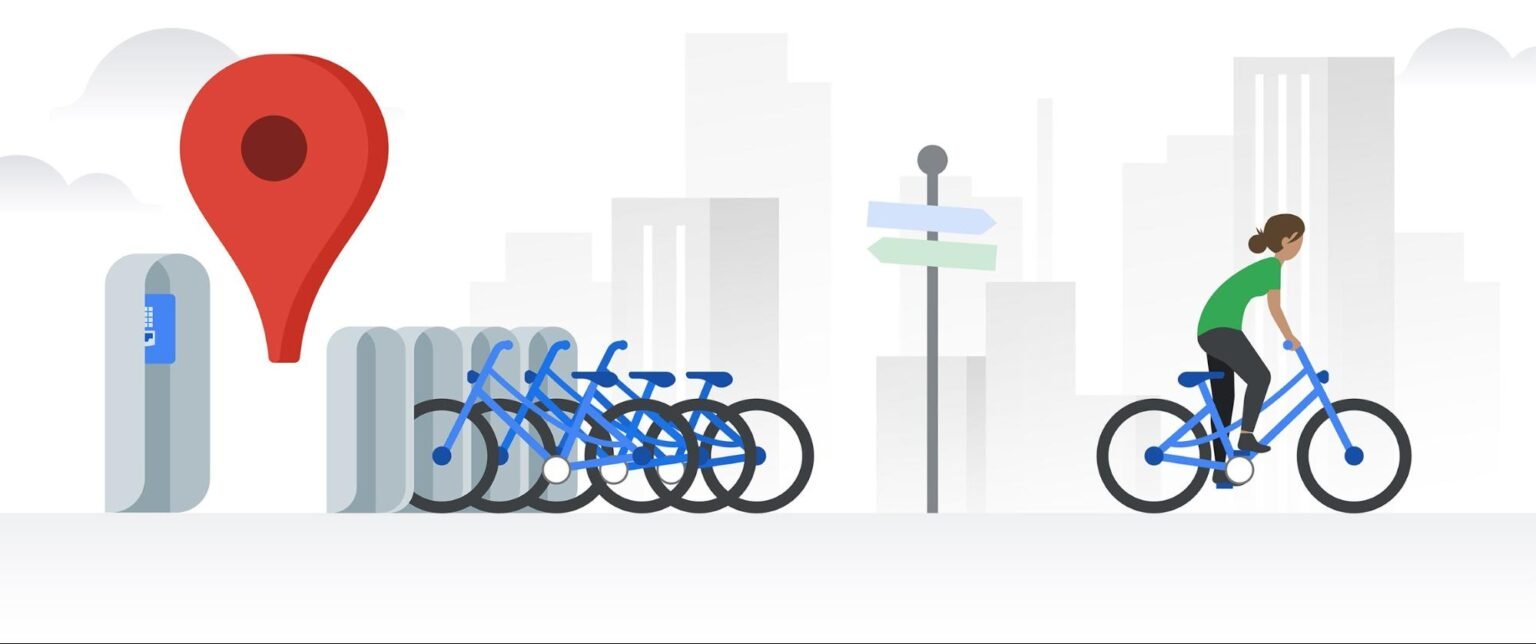

##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Arshad Aafaq D
##### **Team Member 2 -** Kaveri shende
##### **Team Member 3 -** Vamshi
##### **Team Member 4 -** Yogesh
##### **Team Member 5 -** Shubham

# **Project Summary -**

**The Seoul Bike Sharing Demand Prediction project is a great example of the typical process for a data science project. It involves five key stages: defining a problem, data processing, modeling, evaluation, and deployment**.

The first step in this project was to define the problem. The objective was to predict the demand for shared bikes in Seoul based on various features such as temperature, rainfall, season, and snowfall. To achieve this objective, the project involved a thorough understanding of the data by examining its properties, including its size, shape, and quality.

**Data processing is the next step, and it involves cleaning and preparing the data for modeling. In this project**, the data was wrangled, and new features were engineered. One example is the creation of new columns such as month and weekdays. These features were added to the dataset to provide a deeper understanding of how various factors influence bike rentals in Seoul.

**After data processing, the project involved Exploratory Data Analysis (EDA) to gain further insight into the data**. The EDA stage helped to identify relationships between the dependent variable, 'Rental Bike Count,' and other independent variables such as temperature, rainfall, and functioning day.

One of the significant findings from the EDA stage is that rented bikes are less used in winters than summers. Also, functioning day is a crucial factor in determining the number of bikes rented. By checking the correlations, the team discovered that some columns contained outliers that could affect the models' performance. Therefore, they took steps to address the issue by removing the outliers.

**Next, we performed one-hot encoding to convert categorical variables to a format that is more predictable**. They also checked for multicollinearity to avoid redundancy in the model. To optimize the models' performance, the team transformed the variables to a standard scalar (z-score transformation).

**The next step was to split the dataset into training and testing sets. Our team has used a 0.20 ratio to ensure the model's performance is not overfitted**. They applied multiple linear regression, ridge regression, lasso regression, elastic net, polynomial regression, decision tree, and random forest.

To evaluate the model's performance, the team used adjusted R2 and RMSE as evaluation metrics. The results showed that the Random Forest model outperformed other models. Random Forest had the highest adjusted R2 score, indicating that it was the best model to deploy.

**In summary, the Seoul Bike Sharing Demand Prediction project demonstrates the importance of following best practices in data science projects. Our team thoroughly understood the problem and the data and applied various data processing techniques, including feature engineering and data cleaning. We also performed EDA, model evaluation, and selection, and ensured transparency and interpretability of the model by using model explainability.**



# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **GitHub Link -**

https://github.com/arshadaafaq/ML_Linear_Regression_Project

All team members are added as collaborators for this repository.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)

### Dataset Loading

In [ ]:
# Reading the dataset
Url= 'https://drive.google.com/file/d/1dZ7p614gC_iwxHwcj-1N0Lc155AGMTJS/view?usp=share_link'
bike_df= pd.read_csv('https://drive.google.com/uc?id='+ Url.split('/')[-2],encoding= 'unicode_escape')

### Dataset First View

In [ ]:
#creating a copy of dataset
df = bike_df.copy()

In [ ]:
# Dataset First Look
bike_df .head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
bike_df.shape

(8760, 14)



*   There are 8760 recods and 14 features in dataset
*   Rented Bike Count is dependent variables



### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

The dataset contains 8760 rows in total. They are all non-zero. The hour feature has the datatype int64. Because it is a categorical feature, it should be converted to category.

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
Bike_duplicate_values = len(bike_df[bike_df.duplicated()])
print(f"Total number of duplicate rows in the Dataset are:",Bike_duplicate_values)

Total number of duplicate rows in the Dataset are: 0


#### Missing Values/Null Values

In [ ]:
#Checking Null Values
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

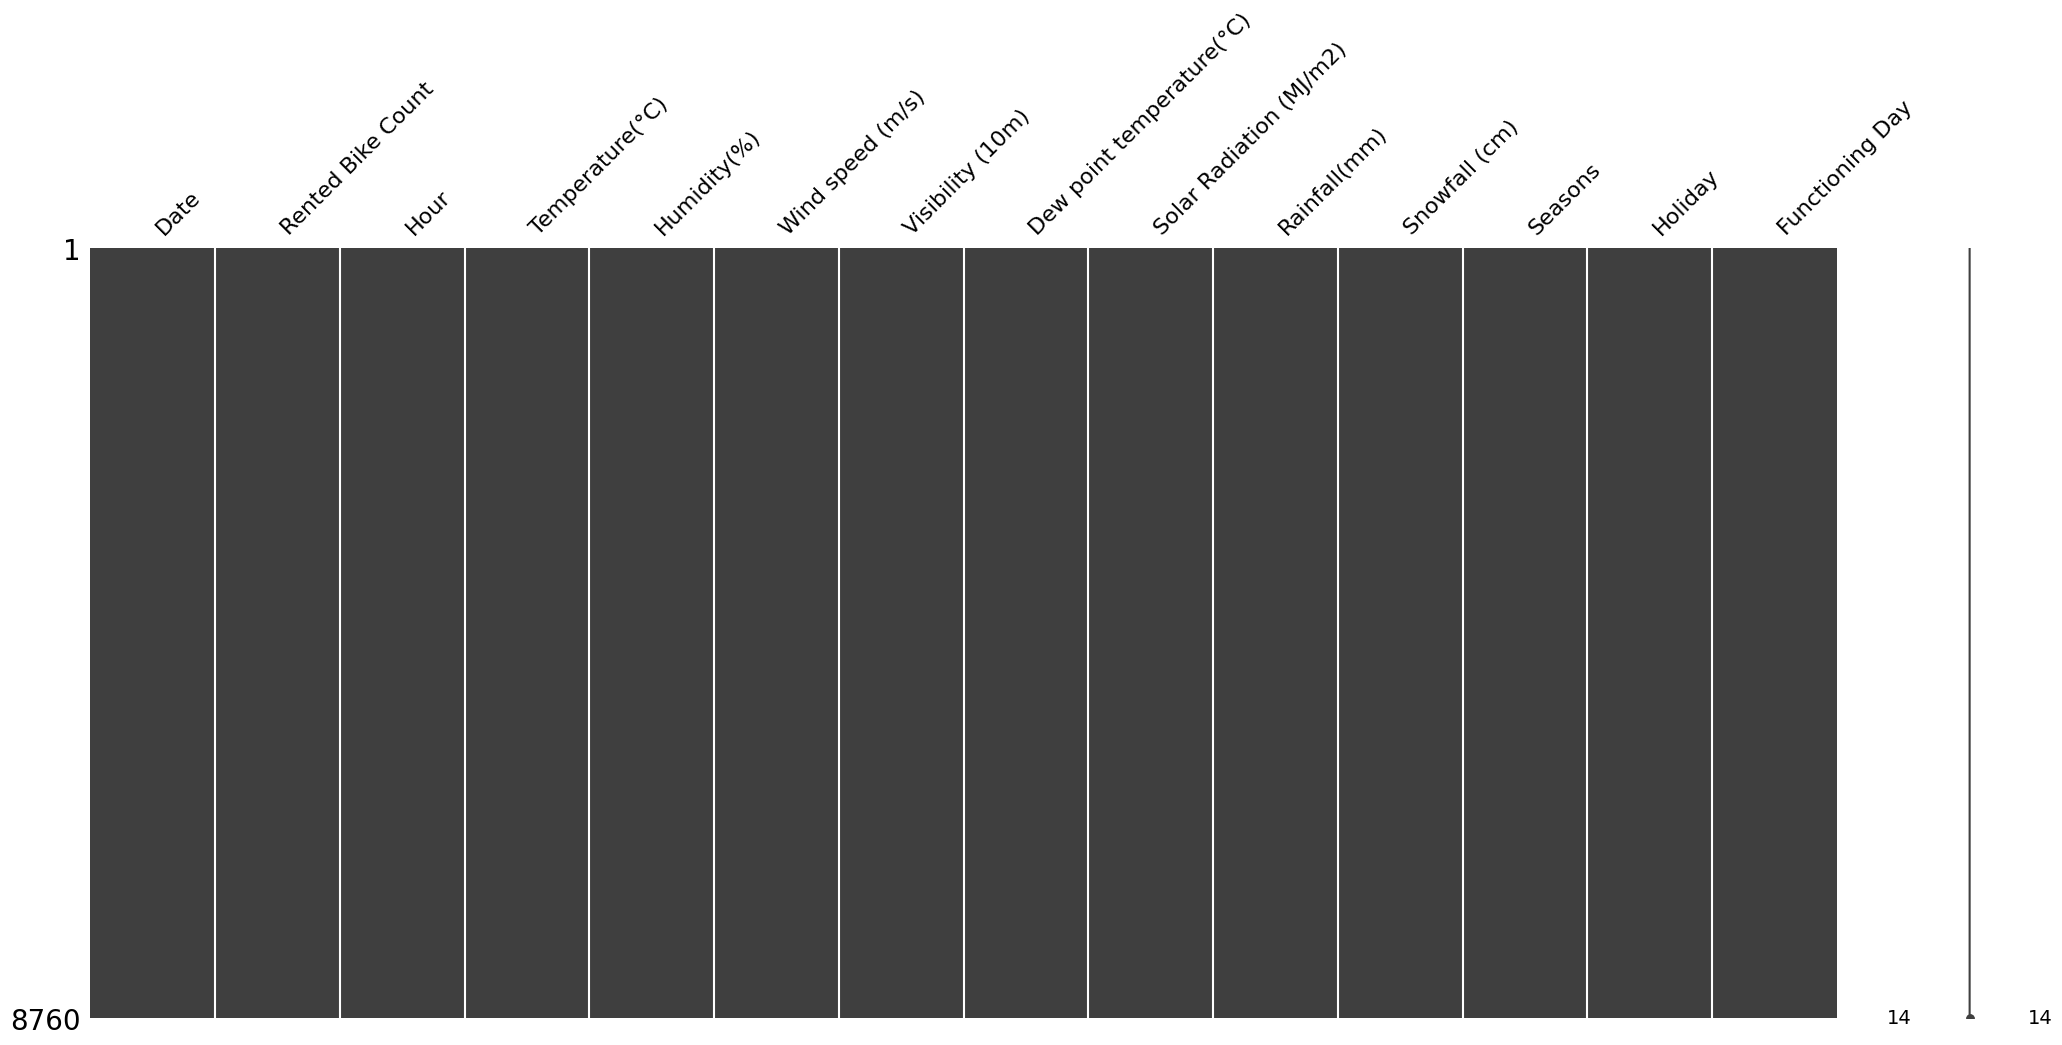

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(df)

From the above result we can see that there are no missing values in datasets

### What did you know about your dataset?




*   Total number of duplicate rows in the Dataset are: 0
*   There are no missing values in Dataset
*   Total number of Rows : 8760
*   Total number of columns: 14



## ***2. Understanding Your Variables***

In [ ]:
#Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#Dataset describe
bike_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### Variables Description


* ### **Date** : *Representing the date of the day, with data type string*
* ### **Rented Bike Count** : *Denoting the hourly number of rented bikes, an integer serving as the dependent variable*
* ### **Hour** : *Indicating the hour of the day, with a range of 0 to 23, and data type integer*
* ### **Temperature (°C)** : *Displaying the temperature in Celsius, with data type float*
* ### **Humidity (%)** : *Reflecting the percentage of humidity in the air, an integer*
* ### **Wind speed (m/s)** : *Measuring the speed of wind in meters per second, with data type float*
* ### **Visibility (10m)** : *Showing the visibility in meters, with data type integer*
* ### **Dew point temperature (°C)** : *Representing the temperature at which water begins to condense from the air, with data type float*
* ### **Solar Radiation (MJ/m2)** : *Illustrating the electromagnetic radiation from the Sun, with data type float*
* ### **Rainfall (mm)** : *Quantifying the amount of rainfall in millimeters, with data type float*
* ### **Snowfall (cm)** : *Indicating the amount of snowfall in centimeters,*
* ### **Seasons** - *The time of year, categorized as a string value*
* ### **Holiday** - *Indicates whether the day is a holiday or not, represented as a string value*
* ### **Functioning Day** - *Determines if the day is functional or not, represented as a string value*Answer Here



### Check Unique Values for each variable.

In [ ]:
#Checking unique values of each variable
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
pd.set_option('display.max_colwidth',None)

In [ ]:
bike_df.apply(lambda col:col.unique())

Date                         [01/12/2017, 02/12/2017, 03/12/2017, 04/12/2017, 05/12/2017, 06/12/2017, 07/12/2017, 08/12/2017, 09/12/2017, 10/12/2017, 11/12/2017, 12/12/2017, 13/12/2017, 14/12/2017, 15/12/2017, 16/12/2017, 17/12/2017, 18/12/2017, 19/12/2017, 20/12/2017, 21/12/2017, 22/12/2017, 23/12/2017, 24/12/2017, 25/12/2017, 26/12/2017, 27/12/2017, 28/12/2017, 29/12/2017, 30/12/2017, 31/12/2017, 01/01/2018, 02/01/2018, 03/01/2018, 04/01/2018, 05/01/2018, 06/01/2018, 07/01/2018, 08/01/2018, 09/01/2018, 10/01/2018, 11/01/2018, 12/01/2018, 13/01/2018, 14/01/2018, 15/01/2018, 16/01/2018, 17/01/2018, 18/01/2018, 19/01/2018, 20/01/2018, 21/01/2018, 22/01/2018, 23/01/2018, 24/01/2018, 25/01/2018, 26/01/2018, 27/01/2018, 28/01/2018, 29/01/2018, 30/01/2018, 31/01/2018, 01/02/2018, 02/02/2018, 03/02/2018, 04/02/2018, 05/02/2018, 06/02/2018, 07/02/2018, 08/02/2018, 09/02/2018, 10/02/2018, 11/02/2018, 12/02/2018, 13/02/2018, 14/02/2018, 15/02/2018, 16/02/2018, 17/02/2018, 18/02/2018, 19/02/2018

## 3. ***Data Wrangling***

In [ ]:
#Renaming the columns
bike_df = bike_df.rename(columns={'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'})

In [ ]:
#Converting the 'date' feature from string to datetime

bike_df['date'] = bike_df['date'].apply(lambda x: dt.datetime.strptime(x,'%d/%m/%Y'))

In [ ]:
bike_df['date']

0      2017-12-01
1      2017-12-01
2      2017-12-01
3      2017-12-01
4      2017-12-01
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: date, Length: 8760, dtype: datetime64[ns]

In [ ]:
#extracting the year and month from the date features
bike_df['year'] = bike_df['date'].dt.year
bike_df['month'] = bike_df['date'].dt.month
bike_df['weekday'] = bike_df['date'].dt.weekday

In [ ]:
# creating a new column of'weekdays_weekend'
bike_df = bike_df.drop(columns = ['date'], axis = 1)

In [ ]:
bike_df.head(5)

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,year,month,weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4


In [ ]:
#extracting unique from weekday
print(bike_df['weekday'].unique())

[4 5 6 0 1 2 3]


In [ ]:
#weekdays are in range of 0-6, so convert it in the range of 1-7
bike_df['weekday'] = np.array(bike_df['weekday']) + 1
bike_df['weekday'].unique()

array([5, 6, 7, 1, 2, 3, 4])

In [ ]:
print(bike_df['month'].unique())

[12  1  2  3  4  5  6  7  8  9 10 11]


In [ ]:
#chaging the datatype of hour to categorical
feat = ['hour']
for ele in feat:
  bike_df[ele] = bike_df[ele].astype('category')

In [ ]:
bike_df['months_string'] = bike_df['month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
bike_df['days'] = bike_df['weekday'].map({1: 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'})

In [ ]:
bike_df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,year,month,weekday,months_string,days
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday


In [ ]:
# dropping 'month' and 'weekday' columns as we have created the months_string and days features from this column
bike_df.drop(['month','weekday','year'], axis = 1, inplace = True)

In [ ]:
bike_df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,months_string,days
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Exploratory Data Analysis
Why do we perform EDA?

Exploratory Data Analysis (EDA) is performed to understand the structure and relationships in a dataset. The main objectives of EDA are to:

Summarize the main characteristics of the data, such as the central tendency, dispersion, and distribution of the variables.

Identify outliers and anomalies in the data that may indicate errors or need further investigation.
Detect patterns, relationships, and dependencies between variables in the data.

Test assumptions and hypotheses about the data, such as the normality of the distribution of a variable or the independence of two variables.

Visualize the data to facilitate understanding and communication of the results to others.
EDA is an important step in the data analysis process as it helps to uncover insights, inform the choice of modeling techniques, and identify potential problems with the data that need to be addressed before building predictive models.

In [ ]:
bike_df.columns

Index(['rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'func_day', 'months_string', 'days'],
      dtype='object')

hour, months_names, days, season, holiday, and func_day are categorical datatypes.

In [ ]:
#list of numerical column
num_columns=['rented_bike_count', 'temp', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temp',
       'solar_radiation', 'rainfall', 'snowfall']
print(f"The numerical columns are {num_columns}")

The numerical columns are ['rented_bike_count', 'temp', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall']


CHART 1

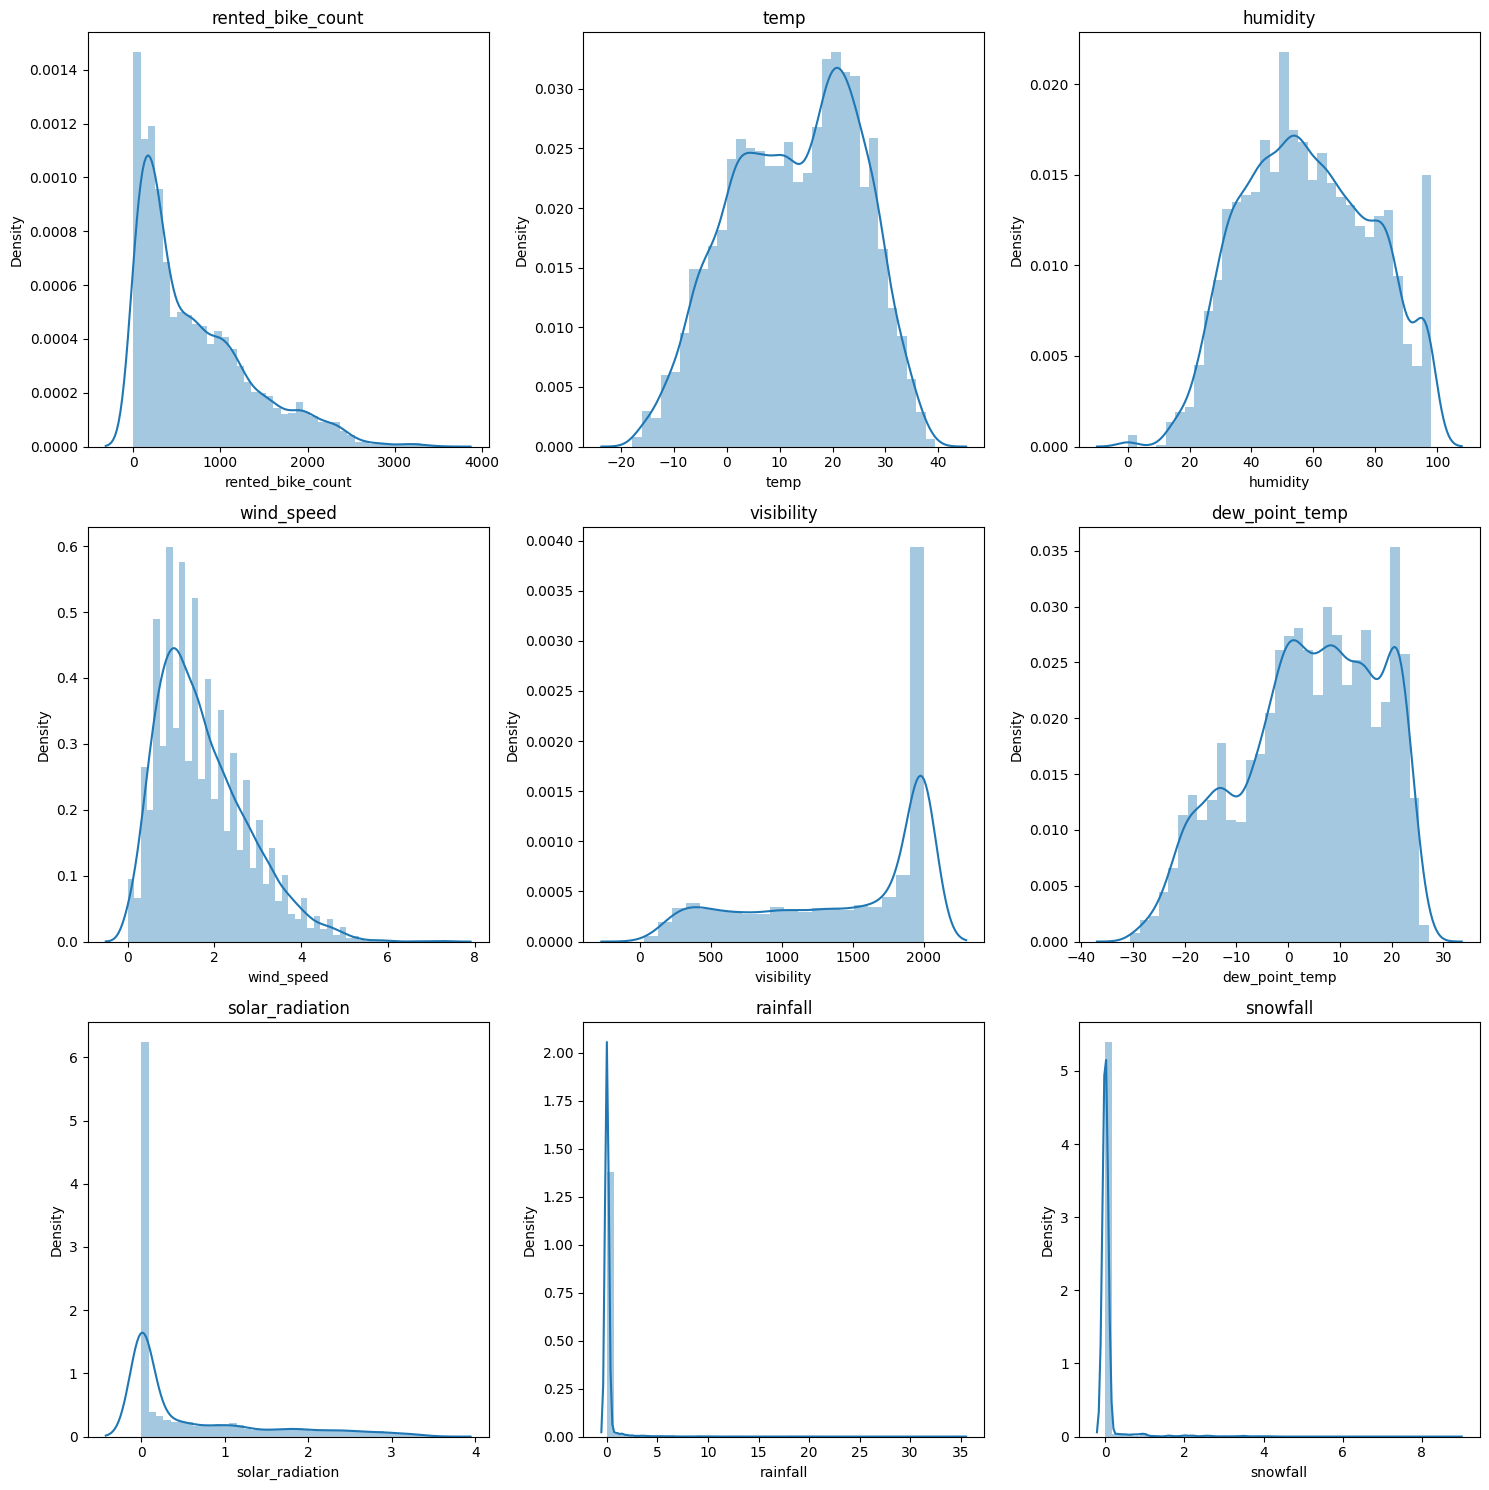

In [ ]:
# Chart - 1 visualization code
# Distribution plot
n=1
plt.figure(figsize=(15,15))
for col in num_columns:
   plt.subplot(3,3,n)
   n+=1
   sns.distplot(bike_df[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()

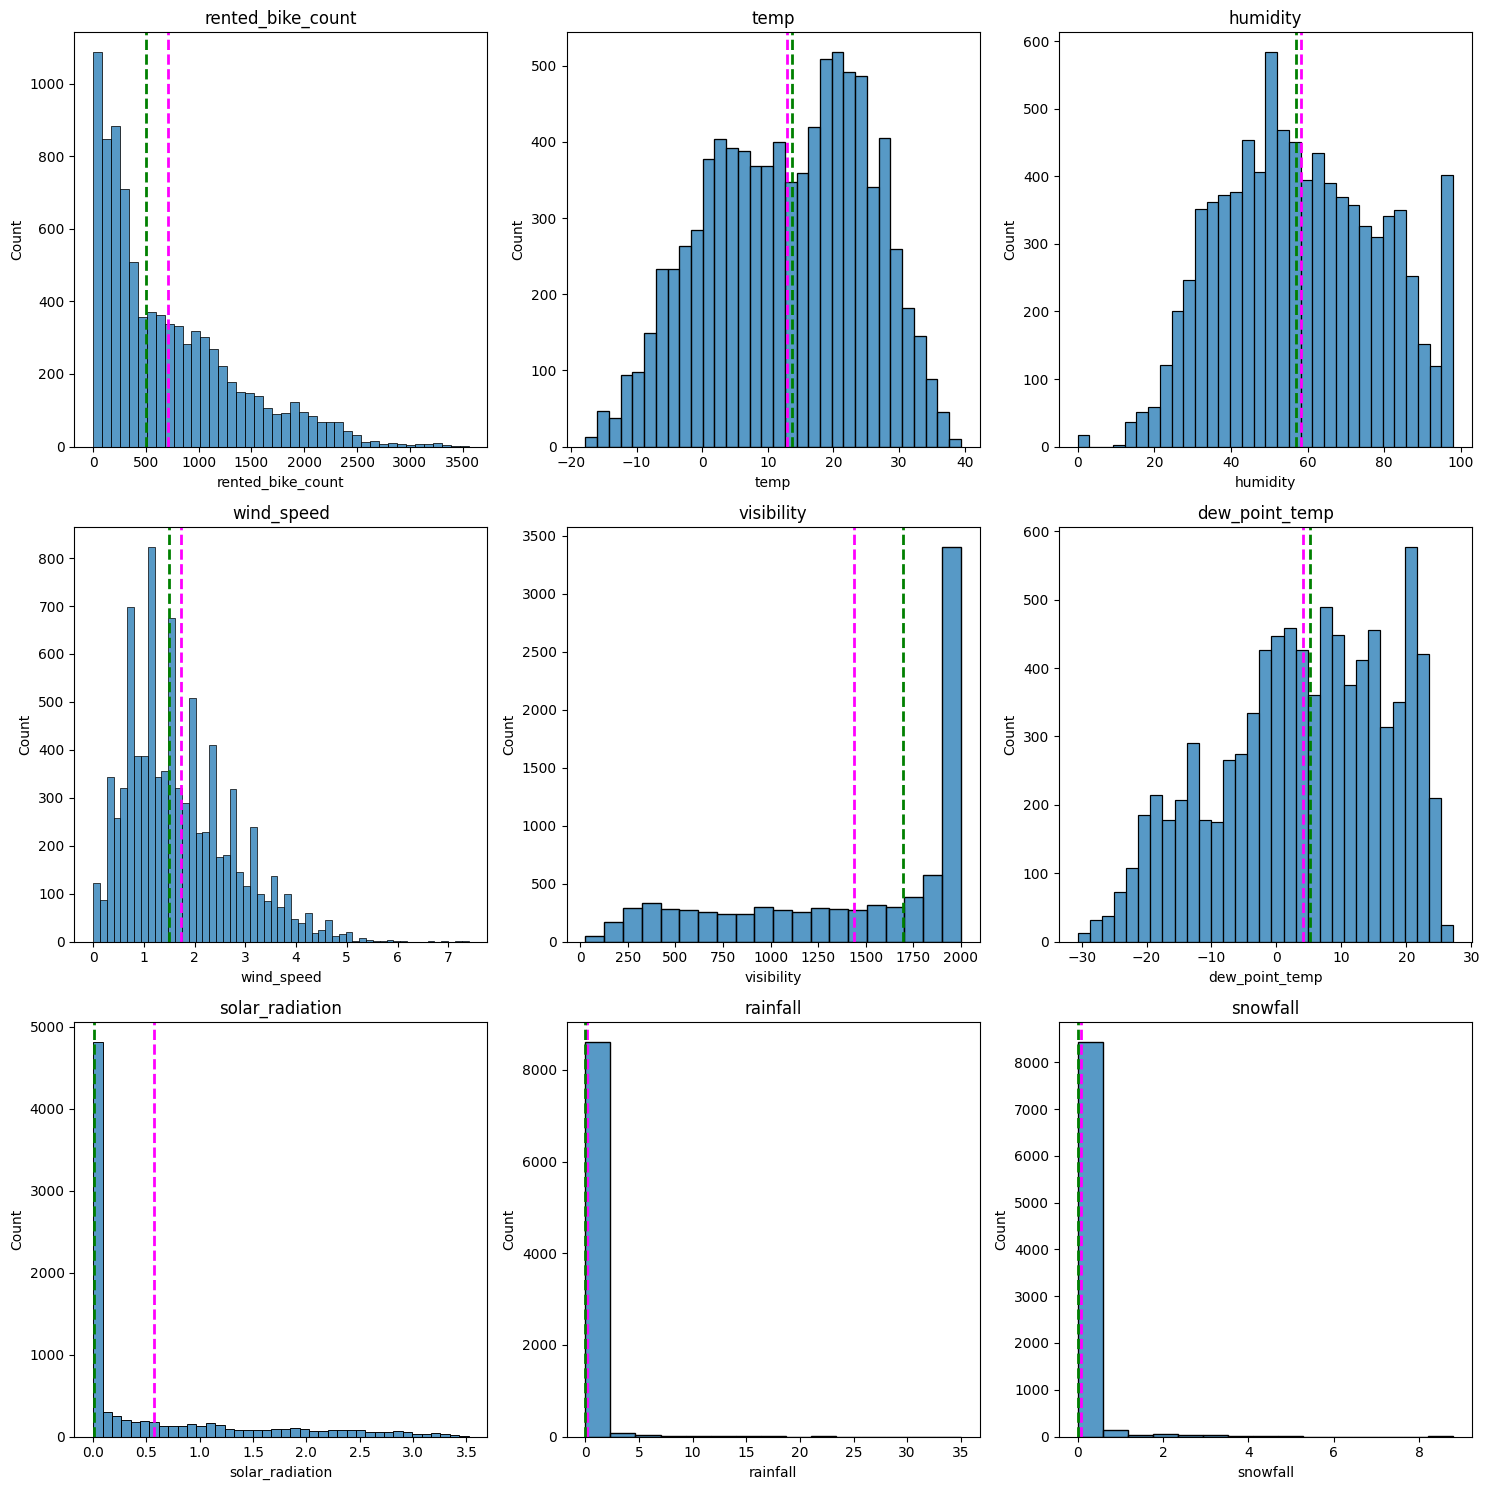

In [ ]:
#Histogram
n=1
plt.figure(figsize=(15,15))
for col in num_columns[:]:
  plt.subplot(3,3,n)
  n+=1
  sns.histplot(bike_df[col])
  plt.axvline(bike_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(bike_df[col].median(), color='green', linestyle='dashed', linewidth=2)
  plt.title(col)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?



1.   I used displot to check the distribution of the plot to see if it is skewed or not.
2.   It provides a flexible interface for creating hitograms, kernel density estimates, and other types of plots.





##### 2. What is/are the insight(s) found from the chart?



The analysis shows that apart from temperature, several columns in the dataset have a skewed distribution, including "Rented Bike Count," "Wind speed (m/s)," "Visibility (10 m)," "Solar Radiation (MJ/m2)," "Rainfall (mm)," and "Snowfall (cm)."

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

1.   Identifying the skewed distribution of variables like "Rented Bike Count" can help businesses better predict demand and plan their resources accordingly
2.   Understanding the skewed distribution of weather-related variables like "Rainfall (mm)" and "Snowfall (cm)" can help businesses prepare for and adjust to weather-related fluctuations in demand or supply.
3.   skewed distributions can make it difficult for businesses to accurately predict demand, leading to overstocking or understocking of inventory






#### Chart - 2


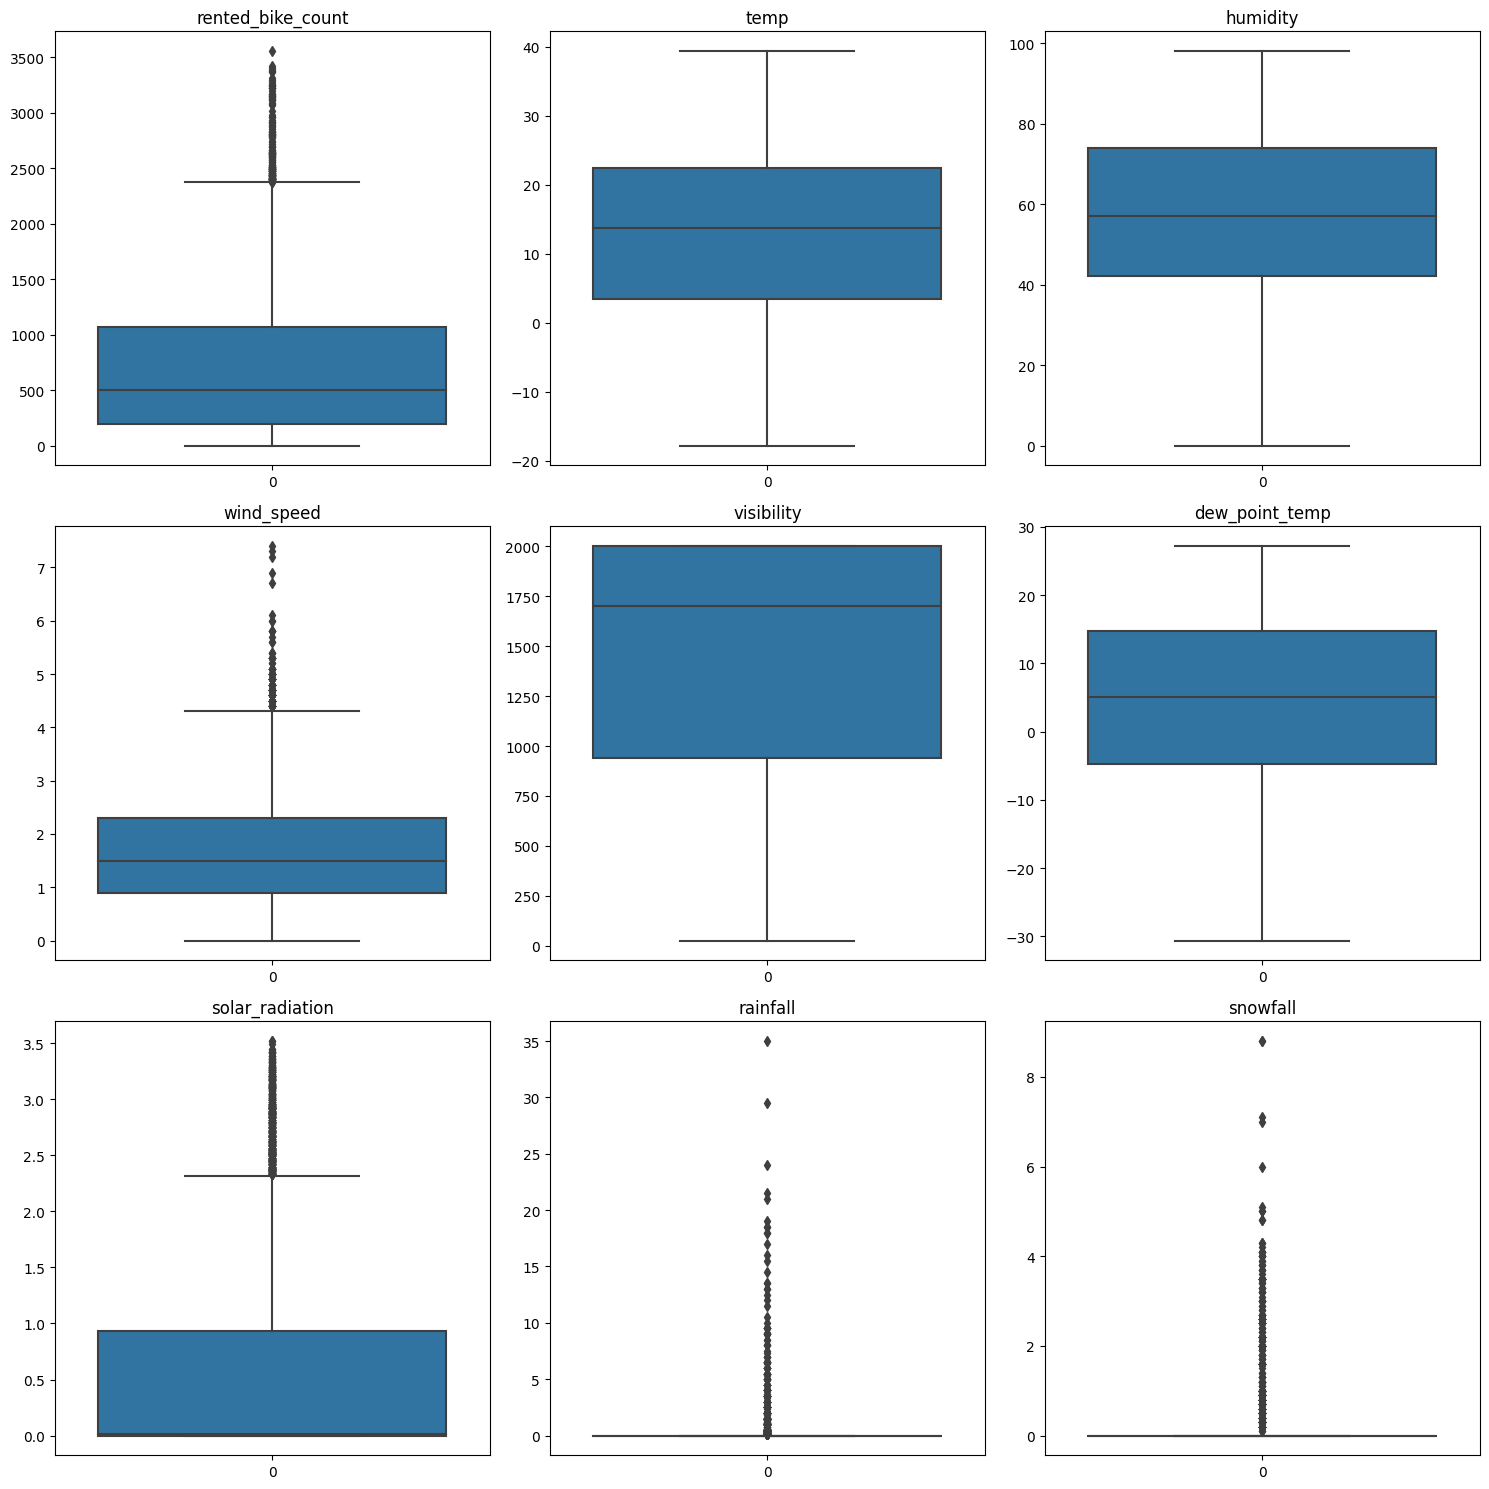

In [ ]:
# Chart - 2 visualization code
#Boxplot
#Checking for outliers
n=1
plt.figure(figsize=(15,15))
for col in num_columns[:]:
  plt.subplot(3,3,n)
  n+=1
  sns.boxplot(bike_df[col])
  plt.title(col)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

The box plot chart displays the distribution of data and identifies outliers, which can provide insight into unusual or unexpected values and help inform data analysis and interpretation.

##### 2. What is/are the insight(s) found from the chart?




The analysis reveals the presence of outliers in several columns, including:

[ 'Rented Bike Count' , 'Wind speed (m/s)' , 'Solar Radiation (MJ/m2)' , 'Rainfall(mm)' , 'Snowfall (cm)']

•	The data for these columns is heavily skewed towards the left.

•	On the other hand, the "Visibility" column has a distribution that skews towards the right.

•	The columns for "Temperature," "Humidity," and "dew point temperature" have a normal distribution centered around the mean.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing a box plot chart can potentially help in creating a positive business impact by providing a better understanding of the data and identifying areas for improvement or opportunities for growth.

For instance, by identifying outliers in the data, a business can gain insights into unexpected or unusual values that may be affecting their operations or performance. By investigating and addressing the underlying causes of these outliers, the business may be able to identify areas where they can improve their processes, products, or services, potentially leading to positive growth.

However, there are also insights that could potentially lead to negative growth. For example, if the box plot chart reveals that there are numerous outliers in the data, this could indicate a significant amount of variability or inconsistency in the business's operations or performance. If left unaddressed, this could potentially lead to negative growth, as customers may perceive the business as unreliable or inconsistent, leading to decreased trust and loyalty.

Therefore, it is important to carefully consider the insights gained from a box plot chart and evaluate their potential impact on the business before making any decisions or taking any actions. By doing so, a business can leverage the insights gained from the box plot chart to create positive business impact and avoid any potential negative effects.

Chart 3

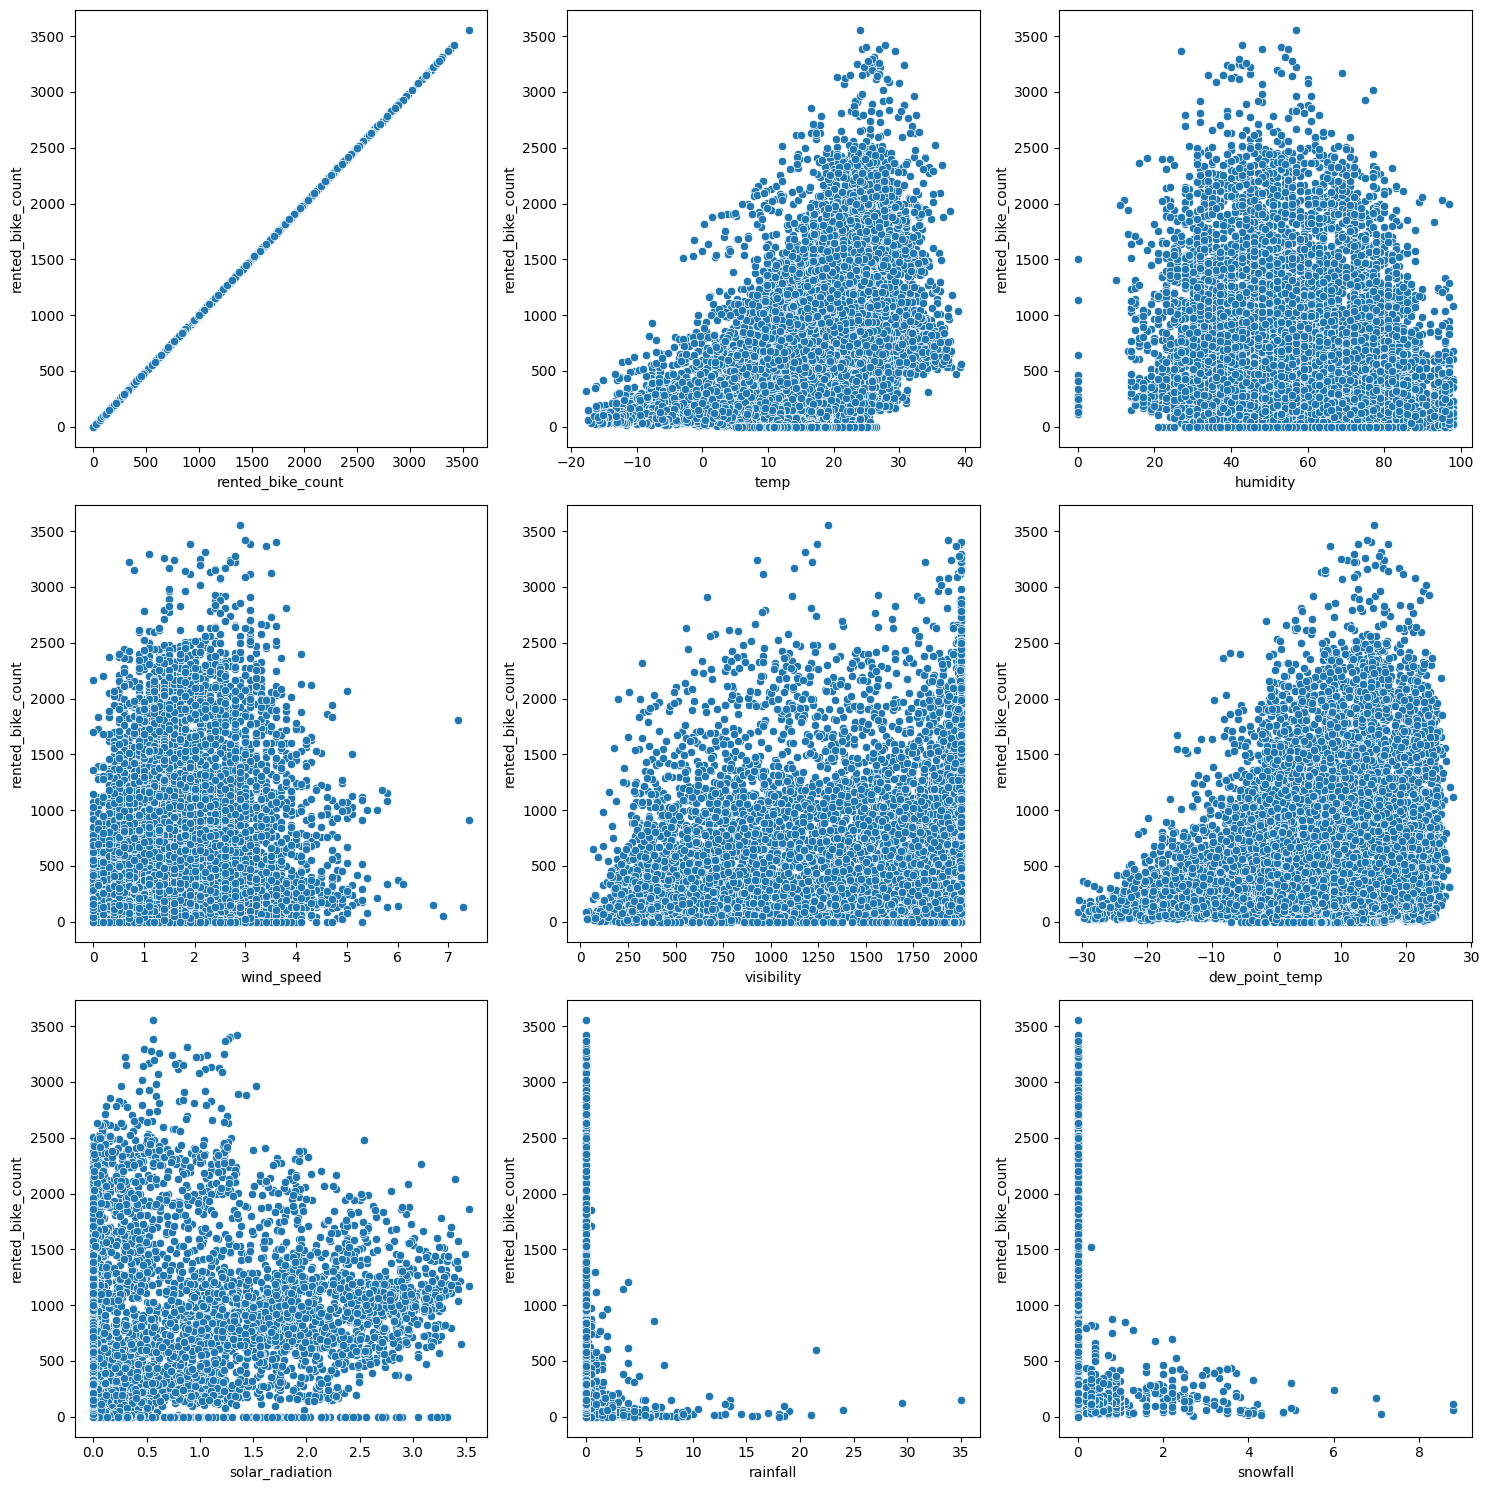

In [ ]:
# Chart - 3 visualization code
#scatter plot
n=1
plt.figure(figsize=(15,15))
for col in num_columns:
  plt.subplot(3,3,n)
  n+=1
  sns.scatterplot(x=col,y='rented_bike_count',data=bike_df)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?


A scatter plot displays the relationship between two variables by plotting each data point as a dot on a two-dimensional chart. It is useful for visualizing data, identifying patterns, and determining the strength and direction of relationships between variables.

##### 2. What is/are the insight(s) found from the chart?


Any linear relationship is not seen among dependent and independent variables.

•	The number of rented bikes increases as the temperature and dew point temperature increase.

•	The highest number of rented bikes is observed when there is no rainfall or snowfall.

•	There is a negative relationship between wind speed and the number of rented bikes, meaning that as wind speed increases, the number of rented bikes decreases.

•	Solar radiation does not appear to have a significant impact on the number of rented bikes.

•	Improved visibility is associated with an increase in the number of rented bikes.

•	Low humidity levels are correlated with a low number of rented bikes.








##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing a scatter plot can potentially help in creating a positive business impact by providing a better understanding of the relationship between two variables and identifying opportunities for growth or improvement.

For example, a scatter plot might reveal a strong positive correlation between two variables, indicating that as one variable increases, so does the other. By identifying this correlation, a business can adjust its strategy to take advantage of this relationship, potentially leading to positive growth.

However, there are also insights that could potentially lead to negative growth. For instance, if a scatter plot reveals a weak or negative correlation between two variables, it may indicate that efforts to improve one variable may not lead to improvement in the other, and resources may be better spent on other areas. If a business does not take this into account and continues to focus on these variables, it could potentially lead to negative growth.

Additionally, it is important to recognize that correlation does not necessarily imply causation. A strong correlation between two variables does not necessarily mean that one variable causes the other, and a business should be cautious not to draw incorrect conclusions based solely on the scatter plot. Therefore, it is important to carefully consider the insights gained from a scatter plot and evaluate their potential impact on the business before making any decisions or taking any actions.

In conclusion, the insights gained from a scatter plot can be valuable in creating a positive business impact, but it is important to interpret the insights carefully and consider any potential negative impacts that they might have on the business.

CHART 4

In [ ]:
cat_columns = [cate_features for cate_features in bike_df.columns if bike_df[cate_features].dtypes == 'O']
print('The categorical features in the dataset are:',cat_columns)

The categorical features in the dataset are: ['seasons', 'holiday', 'func_day', 'months_string', 'days']


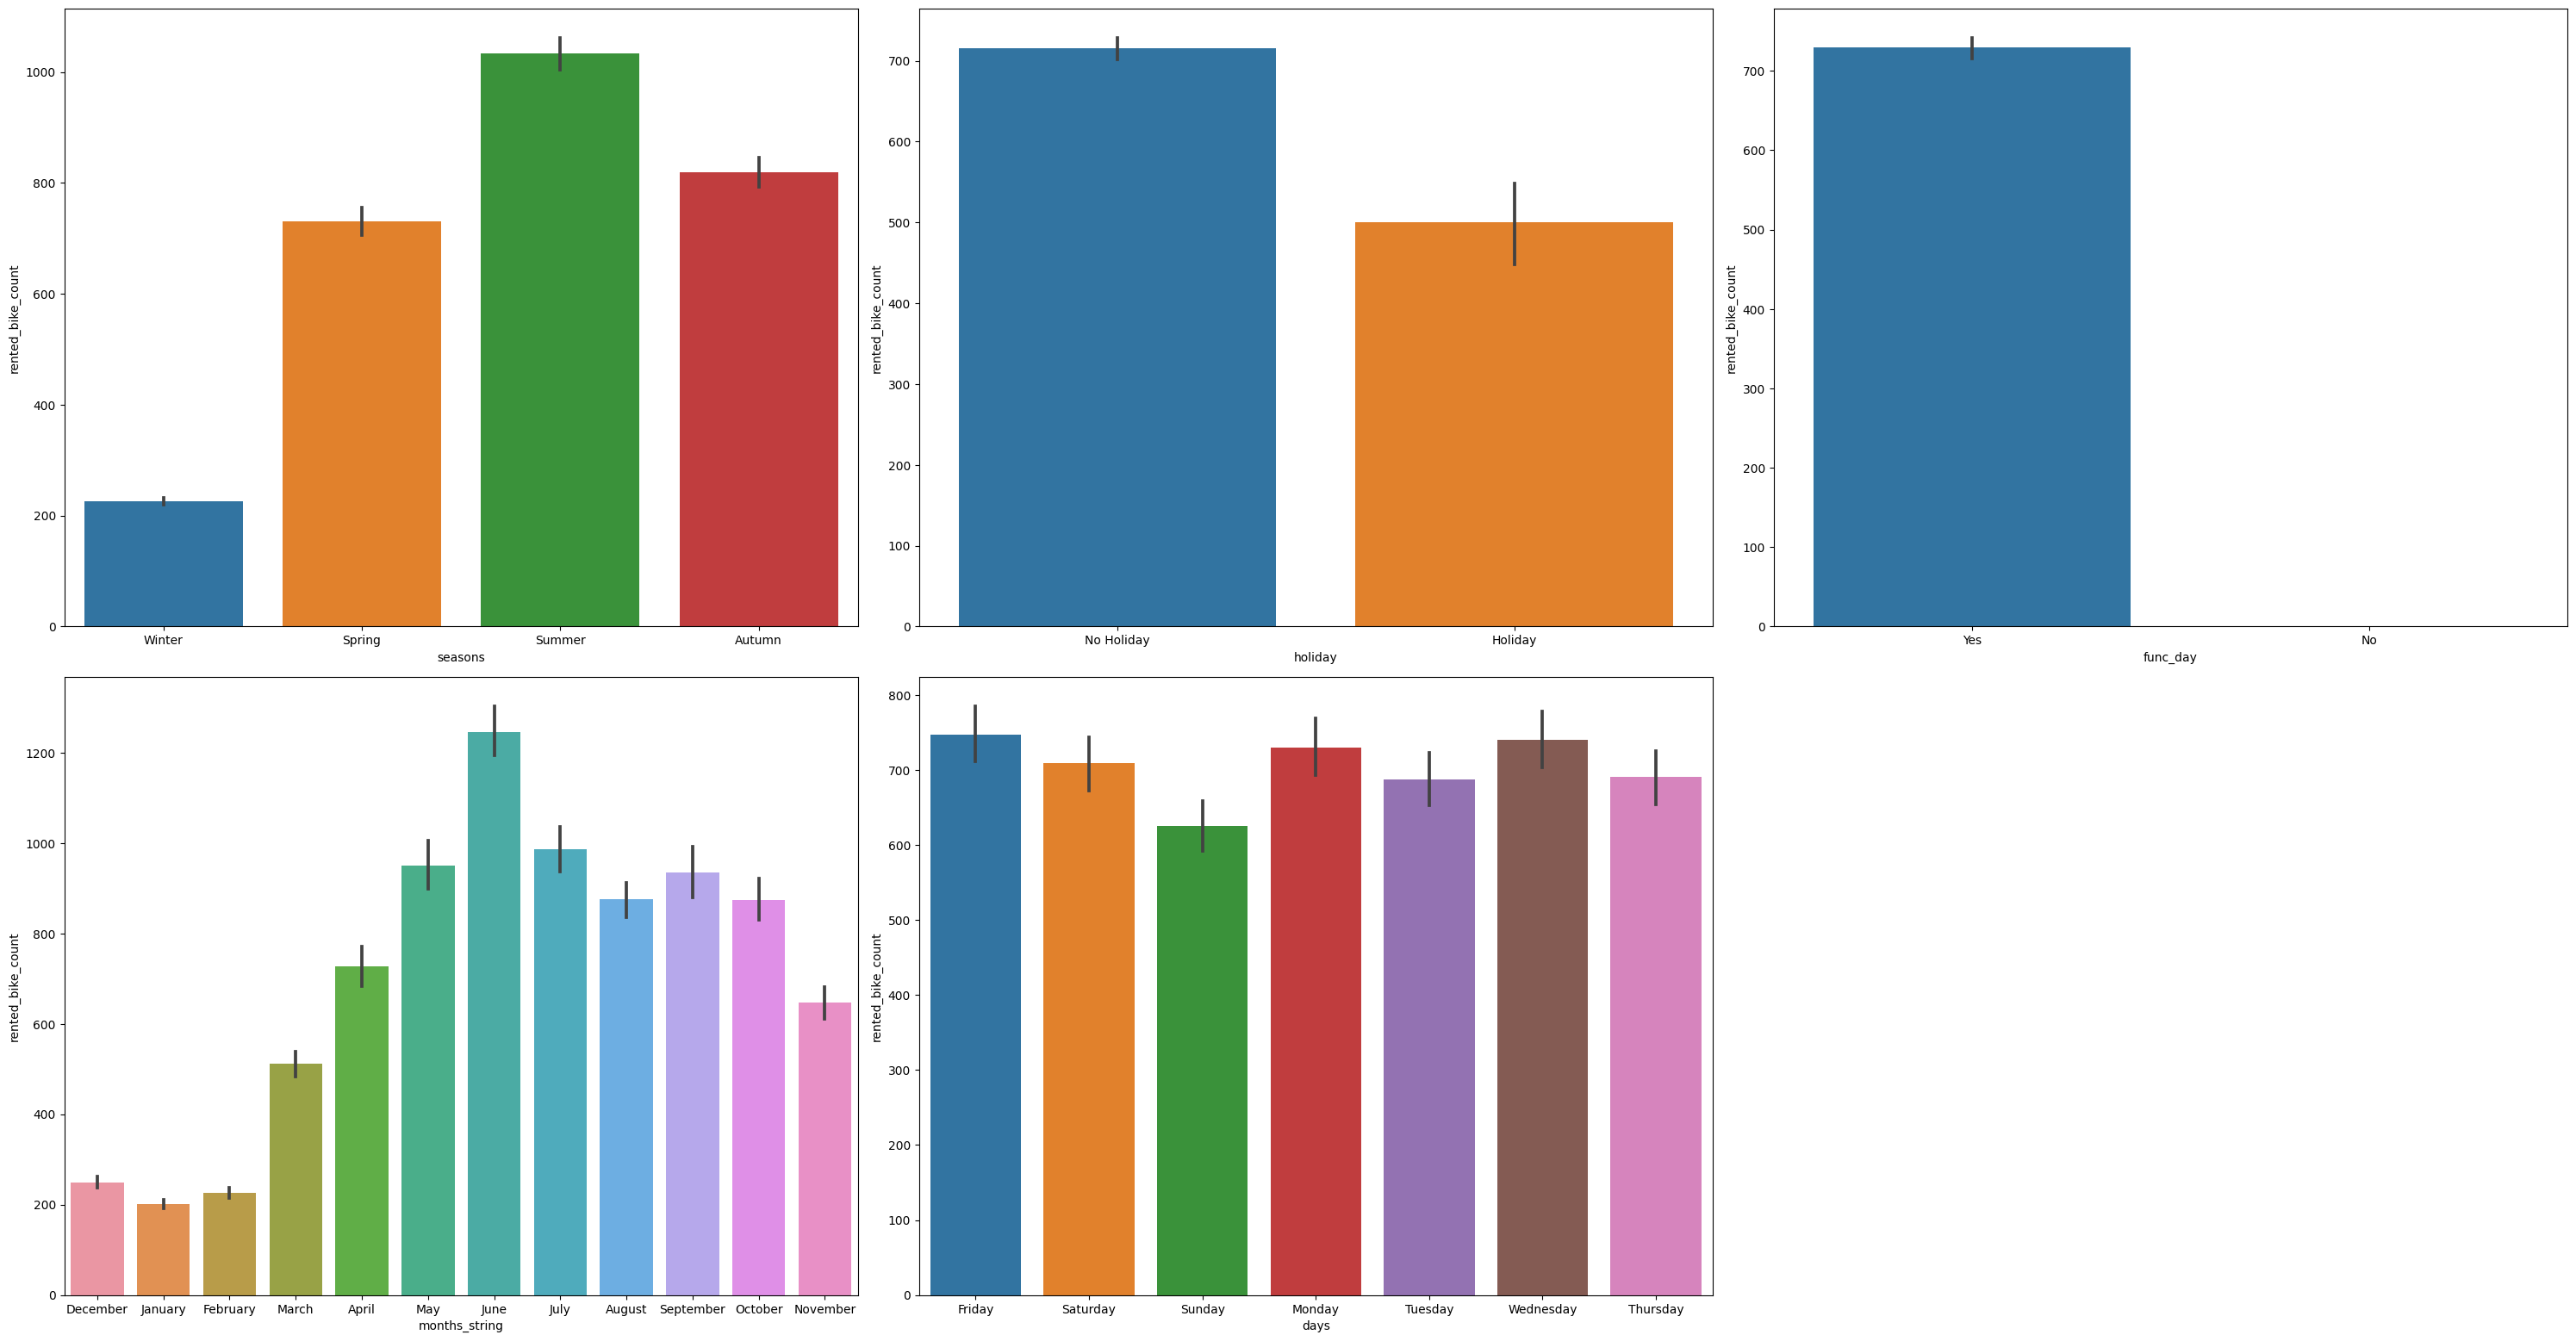

In [ ]:
# Chart - 4 visualization code
#bar plot of Categorical columns
n=1
plt.figure(figsize=(30,23))
for col in cat_columns:
  plt.subplot(3,3,n)
  n+=1
  sns.barplot(x=col,y='rented_bike_count',data=bike_df)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?


Bar plots represent data using rectangular bars, with each bar representing a category and its length or height corresponding to the data value. They are useful for comparing values of different categories or groups and highlighting trends or patterns in data, making them popular in business analysis. Bar plots provide a clear visual representation of data, making it easy to compare values and identify opportunities for growth or improvement.

##### 2. What is/are the insight(s) found from the chart?



1.   The majority of rented bikes are used in the summer season, with the autumn season following closely behind. This suggests that people prefer to ride bikes during pleasant weather.

2.   Rented bikes are used more frequently on non-holidays, indicating that they are primarily used for commuting to work or for other work-related purposes.

3.   Rented bikes are primarily used on functioning days (i.e., weekdays), which further supports the notion that they are used for work-related purposes.

4.   Bikes are less frequently rented during the winter months (December, January, and February) and more frequently rented in May, June, July, and October. This suggests that bikes are preferred during the warmer months.

5.   Bikes are used less frequently on weekends compared to weekdays, further supporting the idea that they are primarily used for work or commuting to work rather than for leisure activities.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights have the potential to create a positive impact on the business by helping to optimize bike rentals and operations. For example, the data shows that bikes are mostly used for work or office purposes, which could inform marketing and promotional efforts targeted towards commuters. However, if the business were to heavily invest in bikes or equipment that are only suitable for winter weather, this could lead to negative growth as the data shows that bikes are less frequently rented during the winter months.

**Exploring Categorical Features**

CHART 5

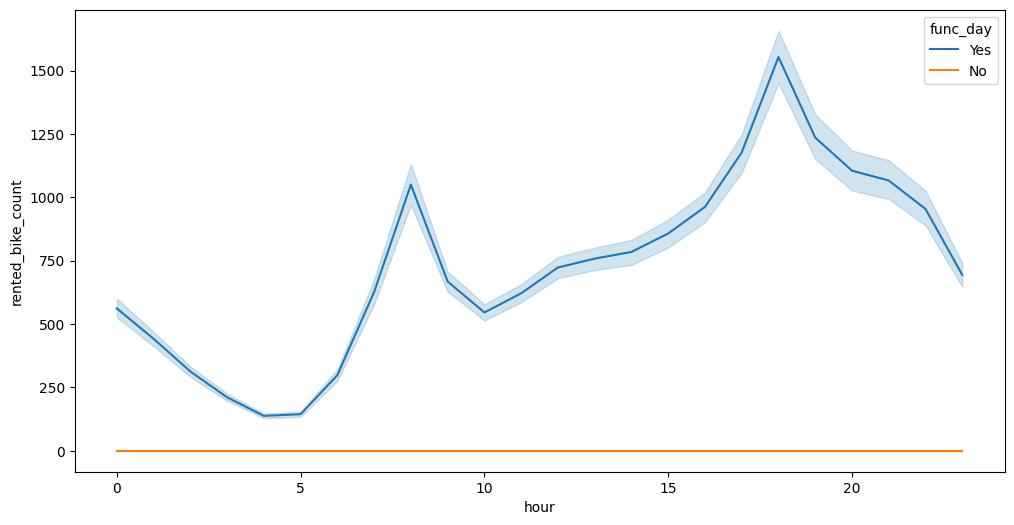

In [ ]:
#Rented bike count on func vs non func day on an hourly basis.
plt.figure(figsize = (12,6))
x0 = sns.lineplot(data = bike_df, x='hour', y = 'rented_bike_count',color = 'g', hue = 'func_day' )

##### 1. Why did you pick the specific chart?


A line plot chart displays data using connected data points to show changes over time. It's commonly used to highlight trends or compare changes in multiple variables. It's a clear and concise way to visualize data and can reveal patterns that might be missed with other charts. Overall, it's a valuable tool for analyzing and communicating complex data trends.

##### 2. What is/are the insight(s) found from the chart?



1.   Rented bike count is observed to be zero on non-functioning days, indicating that people only use bikes on functioning days.

2.   If someone rents a bike, it can be assumed that it is a functioning day, highlighting the strong association between bike usage and working days.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be useful for businesses offering bike rentals, as they can use this data to tailor their services and marketing strategies to better meet the needs of customers during functioning days and potentially attract and retain more customers.



*   People uses bike only on functioning day
*   If anyone rent bike on a day then its functioning day



**Exploring Numerical Features**

In [ ]:
#Numerical features without Dependent Variable's
numerical_features = [feature for feature in bike_df.columns if bike_df[feature].dtypes != 'O' and feature not in ['weekday', 'month', 'date', 'year', 'rented_bike_count', 'hour']]
numerical_features

['temp',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall']

CHART 6

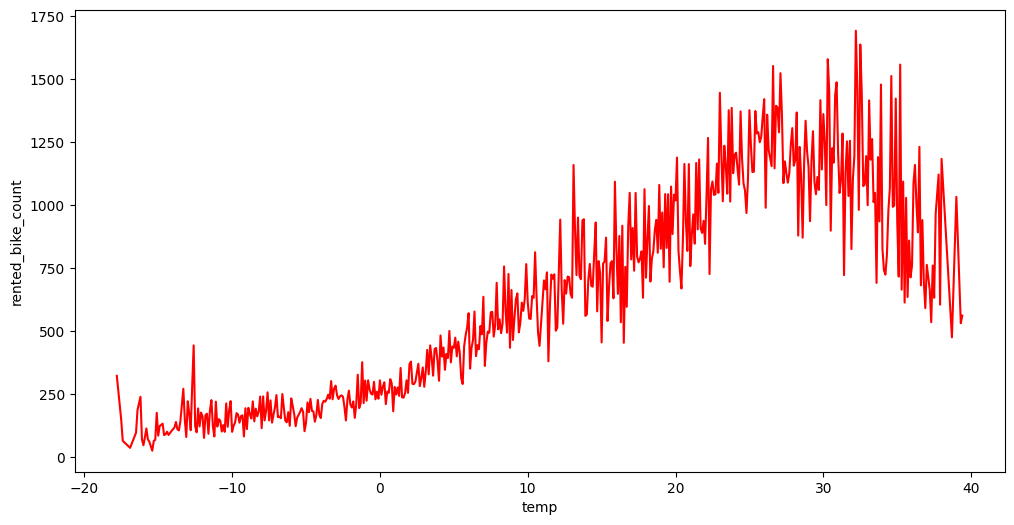

In [ ]:
# Plotting number of bike rented vs temperature
plt.figure(figsize = (12,6))
temp_df = bike_df.groupby('temp').mean()['rented_bike_count']
x0 = sns.lineplot(data = temp_df,color ='r')

##### 1. Why did you pick the specific chart?


A line plot is a basic chart that displays data as points connected by lines, often used to show trends and changes over time or a continuous range of values.

##### 2. What is/are the insight(s) found from the chart?



1.   It can be noted that number of bike rented increase with increase in temperatures
2.   The maximum demand is between 28 and 33 degrees Celsius.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



1.   When the temperature is high, we have to increase our inventory to avoid losing our potential customers.
2.   The number of bikes is decreasing with the decrease in temperatures, so we need to organise any campaigns in the winter season.





CHART 7

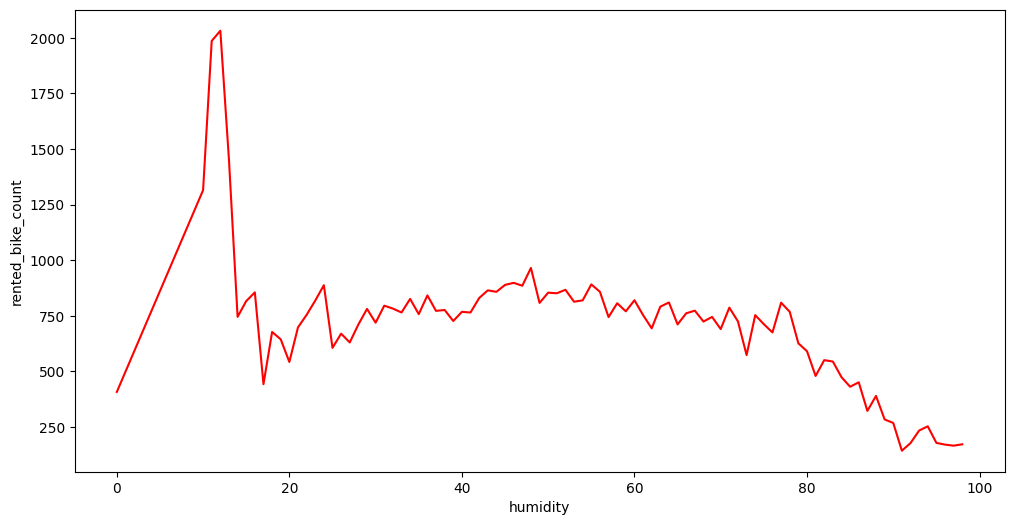

In [ ]:
# Understanding relationship between rented bike count and humidity
plt.figure(figsize = (12,6))
temp_df = bike_df.groupby('humidity').mean()['rented_bike_count']
x0 = sns.lineplot(data = temp_df,color ='r')

##### 1. Why did you pick the specific chart?


A line plot is a basic chart that displays data as points connected by lines, often used to show trends and changes over time or a continuous range of values.

##### 2. What is/are the insight(s) found from the chart?



1.   There was a sudden peak in the bike count between 10 and 15 humidity.
2.   As the humidity rises, the number of bikes on the road decreases.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.





1.   When the humidity drops, we can offer some discounts to increase sales.

2.   There was a sudden peak in the bike count between 10 and 15 percent humidity. We need to increase our supply, particularly on those days, because we may get new potential customers, retain them, and then convert them into our regular customers.









CHART 8

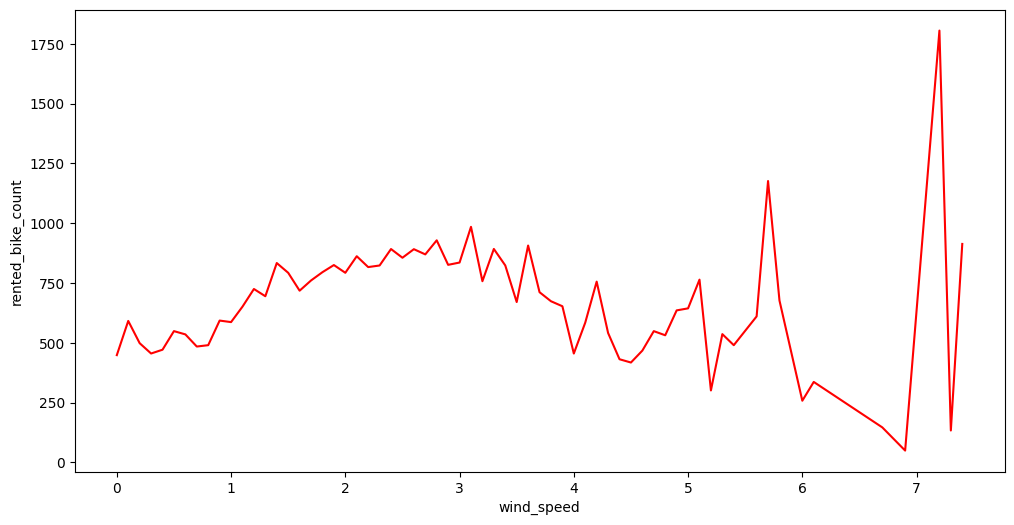

In [ ]:
# Understanding relationship between rented bike count and windspeed
plt.figure(figsize = (12,6))
temp_df = bike_df.groupby('wind_speed').mean()['rented_bike_count']
x0 = sns.lineplot(data = temp_df,color ='r')

##### 1. Why did you pick the specific chart?


A line plot is a basic chart that displays data as points connected by lines, often used to show trends and changes over time or a continuous range of values.

##### 2. What is/are the insight(s) found from the chart?

When the wind speed starts up, the number of bikes gradually drops until it reaches a maximum at about 7 m/s.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This analysis reveals both positive and negative information, enabling us to determine when to raise and when to drop our bike rental pricing. For example, when the wind speed is low, we will raise the price, and when it increases, we will begin to lower it.

CHART 9

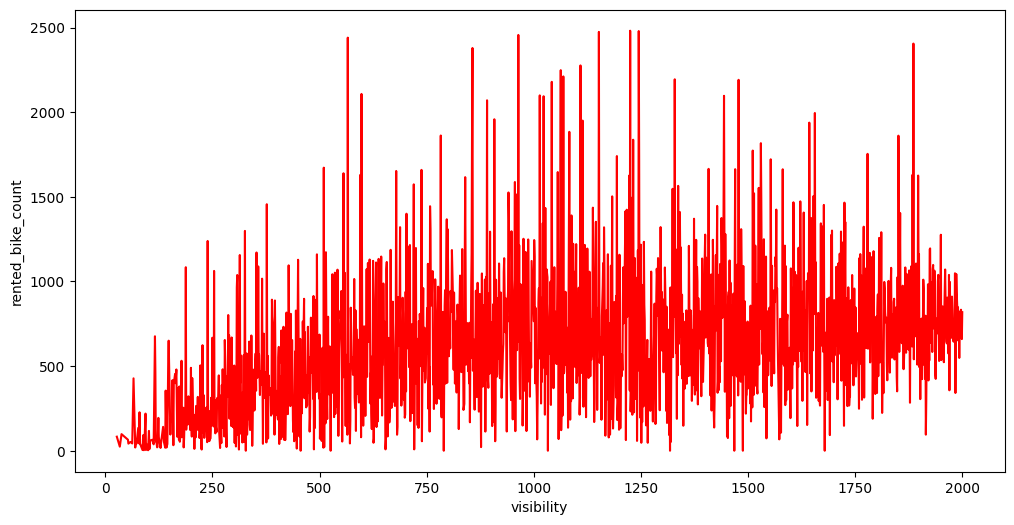

In [ ]:
# Understanding relationship between rented bike count and visibility(10m)
plt.figure(figsize = (12,6))
temp_df = bike_df.groupby('visibility').mean()['rented_bike_count']
x0 = sns.lineplot(data = temp_df,color ='r')

##### 1. Why did you pick the specific chart?


A line plot is a basic chart that displays data as points connected by lines, often used to show trends and changes over time or a continuous range of values.

##### 2. What is/are the insight(s) found from the chart?

The number of rented bikes is unaffected by visibility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

helps, but just a very limited percentage.

CHART 10

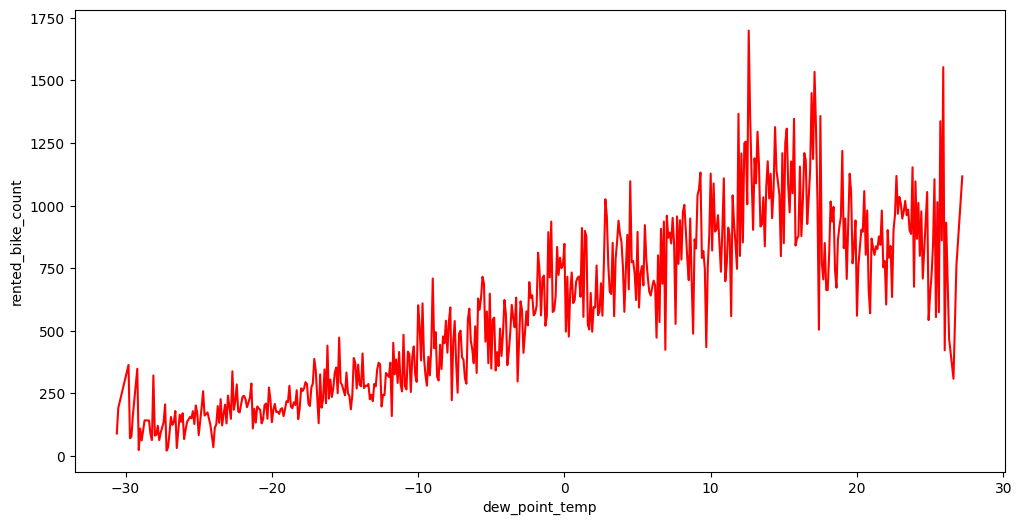

In [ ]:
# Understanding relationship between rented bike count and dew_point_temperature
plt.figure(figsize = (12,6))
temp_df = bike_df.groupby('dew_point_temp').mean()['rented_bike_count']
x0 = sns.lineplot(data = temp_df,color ='r')

##### 1. Why did you pick the specific chart?


A line plot is a basic chart that displays data as points connected by lines, often used to show trends and changes over time or a continuous range of values.

##### 2. What is/are the insight(s) found from the chart?

1.   From the above chart we can see that with increase in the dew point tempertaure, there is gradual increase in the rented bike count.
2.   There is an increasing trend in rented bike count upto almost 18 degree celsius.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the dew point temperature is the temperature at which air becomes saturated with water vapor and condensation begins to form. It is an important parameter, as it can affect human comfort as well as equipment performance.

According to Business perspective, we should keep track of weather and maintain the inventory accordingly when the weather is more clear and sunny.

Dew point temperature is important in automobile applications that involve the use of compressed air. If the dew point of the compressed air is too high, it can cause damage to equipment and compromise the quality of the final product.

CHART 11

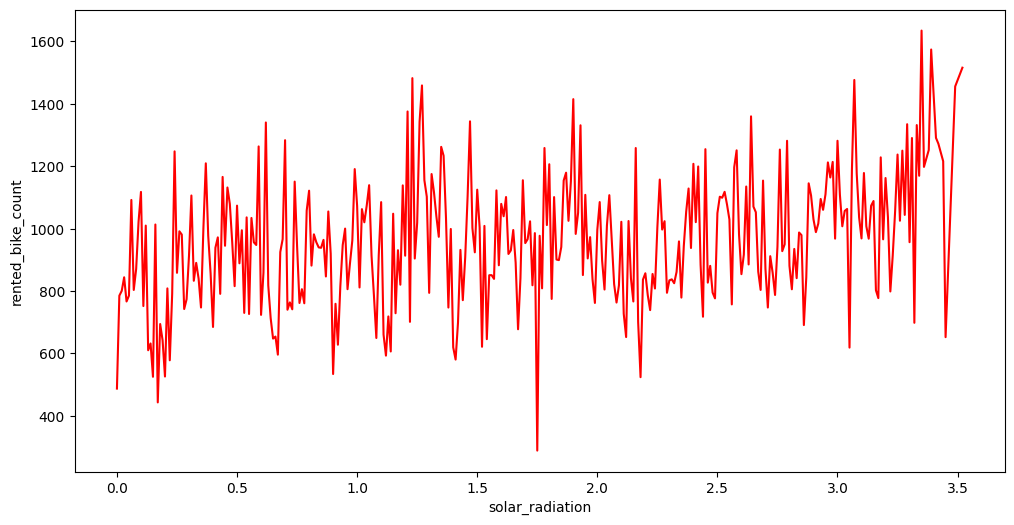

In [ ]:
# Understanding relationship between rented bike count and solar_radiation(mj/m2)
plt.figure(figsize = (12,6))
temp_df = bike_df.groupby('solar_radiation').mean()['rented_bike_count']
x0 = sns.lineplot(data = temp_df,color ='r')

##### 1. Why did you pick the specific chart?


A line plot is a basic chart that displays data as points connected by lines, often used to show trends and changes over time or a continuous range of values.

##### 2. What is/are the insight(s) found from the chart?

Solar Radiation has minimal impact on rented bike count. As the radiation increases renatl bike count is also increasing but at ver slow rate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From this plot we were unable to generate any impactful insights which can help with Business Growth.

CHART 12

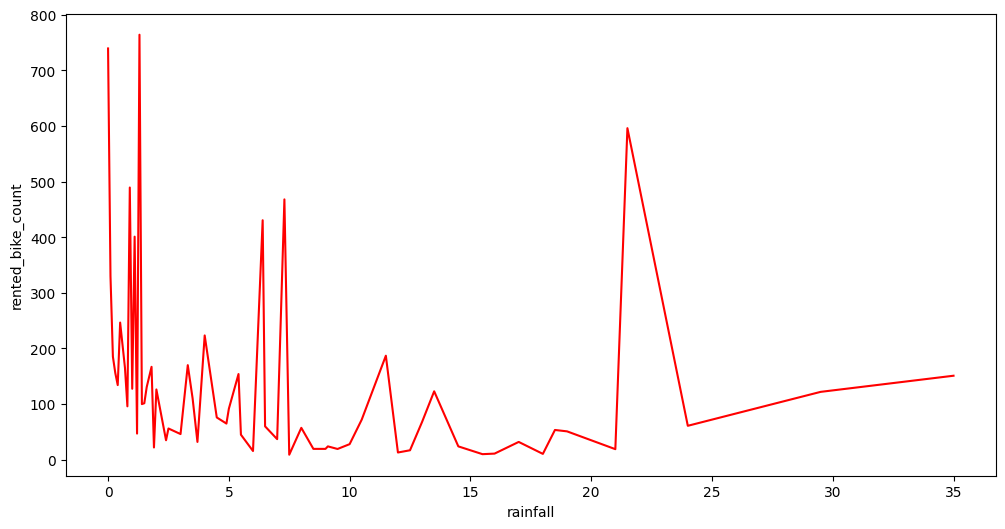

In [ ]:
# Understanding relationship between rented bike count and rainfall(mm)
plt.figure(figsize = (12,6))
temp_df = bike_df.groupby('rainfall').mean()['rented_bike_count']
x0 = sns.lineplot(data = temp_df,color ='r')

##### 1. Why did you pick the specific chart?


A line plot is a basic chart that displays data as points connected by lines, often used to show trends and changes over time or a continuous range of values.

##### 2. What is/are the insight(s) found from the chart?

1.   As we can see the demand for rented bikes is very high when there is no rainfall, which decreases as rainfall increases.
2.   We are also able to witness a spike in bike count around 22mm of rainfall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we all know Rainfall is typically measured in units of length, such as millimeters or inches, the same is replicated in the above chart.

The amount of rainfall can vary greatly from one region to another, and can be affected by factors such as topography, climate, and atmospheric circulation patterns.

Also, it differes from person to person that some people enjoy riding a bike during rainfall and some may not and this is the reason that we can see a sudden increase in demand of bikes even during rainfall.

We can say that the business is not much impacted due to rainfall as it can also have a positive impact on the business.

CHART 13

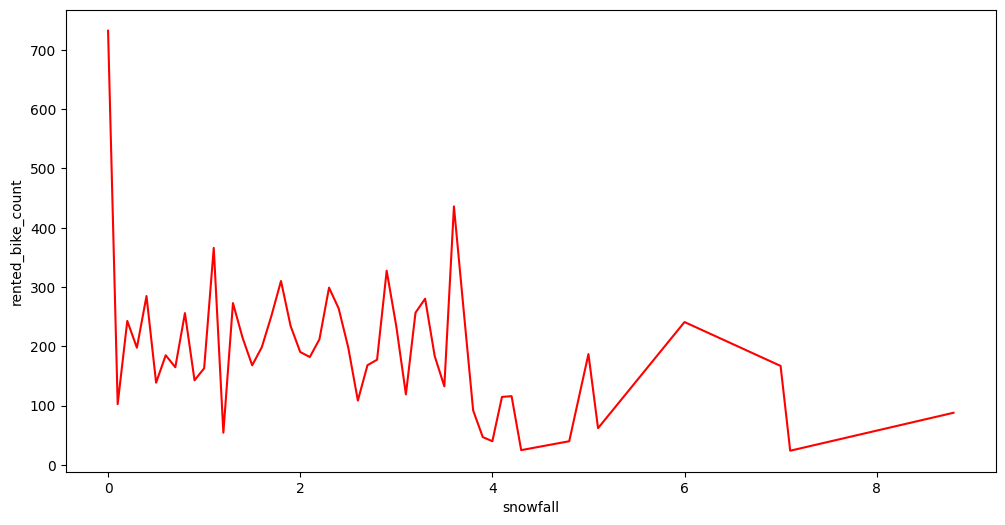

In [ ]:
# Understanding relationship between rented bike count and snowfall(cm)
plt.figure(figsize = (12,6))
temp_df = bike_df.groupby('snowfall').mean()['rented_bike_count']
x0 = sns.lineplot(data = temp_df,color ='r')

##### 1. Why did you pick the specific chart?


A line plot is a basic chart that displays data as points connected by lines, often used to show trends and changes over time or a continuous range of values.

##### 2. What is/are the insight(s) found from the chart?

Rental Bike demand is high for no snow days.

On snow days the demand is low but important thing to notice is that as the snow increases, the demand is not going low rather fluctuating around the mean of 200 renatal bikes per day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is insight kinda helps in knowing what can lead to negative growth, because if we have a bad year with most of the days having snow it'll adversely impact the rental bike count avg for the year.

Eventhough having snow or not in our control, renting bikes in non snow regions will have higher rented bike renatls and helps in business growth to start in those regions.

Observation on relation between numerical fatures and dependent variable

**temp** - Temperature is positively correlated with the people using bikes. The maximum is between 20 °C and 30 °C.

**humidity** - Humidity is the amount of water vapor in the air. Looking at the reg plot, people prefer using bikes when there is less humidity.

**visibility** - Visibility does not affect much still showing a slight positive correlation with people renting bike.

**snowfall and rainfall** - People don't prefer renting bike when there is ranifall or snowfall.

**dew_point_temp** - The dew point temperature is positively correlated to the dependent variable.

**wind_speed** - The wind speed don't affect much the dependent variable.

**Solar_radiation** - Solar radiation seems to slightly positive correlated with the dependent variable.

CHART 14

### **Understanding relation between other features and dependent variable**





<Axes: xlabel='hour', ylabel='rented_bike_count'>

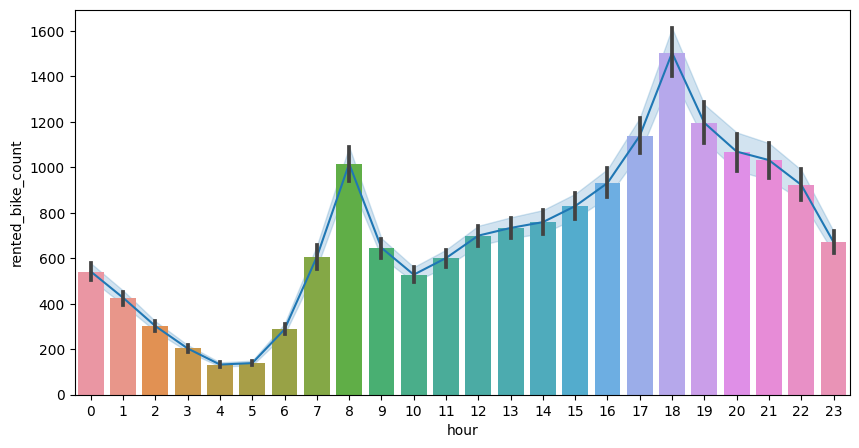

In [ ]:
#Relationship between hour and rented_bike_count
plt.figure(figsize = (10,5))
sns.lineplot( x = bike_df['hour'], y = bike_df['rented_bike_count'])
sns.barplot(x = bike_df['hour'], y = bike_df['rented_bike_count'])

##### 1. Why did you pick the specific chart?


Seaborn's line chart displays the relationship between two variables using data points connected by lines, and provides customization options. Bar plots use bars to represent data categories, making comparisons easy. They are commonly used to identify trends and patterns and are a popular tool for data analysis.

##### 2. What is/are the insight(s) found from the chart?

During Morning time from 6th to 9th hour there's high demand, 8th hour being peak in morning time.

And then from 12th hour onwards the demands increases till 18th hour and stard decreasing gradually.

Overall 18th hour the peak hour with high demand

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Important insight helping in creating a positive business impact is that we need to have enough inventory to match the demand in peak hours, as we know which hours are peak and the avg demand for those hours.

CHART 15

<Axes: xlabel='hour', ylabel='rented_bike_count'>

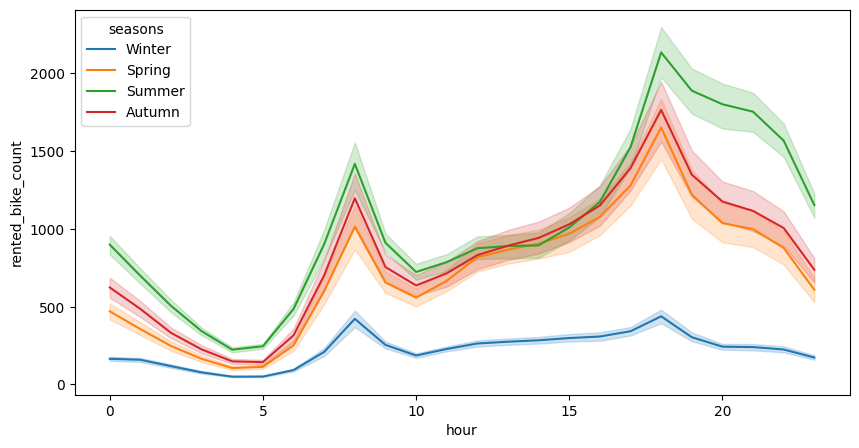

In [ ]:
# line plot of hour vs rented bike count with respect to seasons
plt.figure(figsize = (10,5))
sns.lineplot(data = bike_df, x = 'hour', y = 'rented_bike_count', hue = 'seasons')

##### 1. Why did you pick the specific chart?


A line plot is a type of graph that displays data as points and it is useful for displaying continuous data over time or space, and we picked these data to plot relationship between rented_bike_count and seasons

##### 2. What is/are the insight(s) found from the chart?

* The above plot indicates that people prefer renting bike more in summer season and least in winter season.
* Looking at the time it is possible that people going to offices use bikes for commute.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Through this it is clear that people are preffering more bikes in summer so avalibility of bikes should be maximum in summer

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0): Number of Bikes rented are Normaly Distributed.

Alternate Hypothesis(H1 or Ha): Number of Bikes rented are not Normally Distributed

#### 2. Perform an appropriate statistical test.

In [ ]:
# Check if dependant feature is normally distributed

from scipy.stats import normaltest

stat,p = normaltest(bike_df['rented_bike_count'])

print('stat=%.2f, p=%.30f' % (stat, p))

if(p>0.05):
  print('Null Hypothesis accepted. Number of Bikes rented are normally distributed')
else:
  print('Rejected Null Hypothesis. Number of Bikes rented are not normally distributed')

stat=1415.73, p=0.000000000000000000000000000000
Rejected Null Hypothesis. Number of Bikes rented are not normally distributed


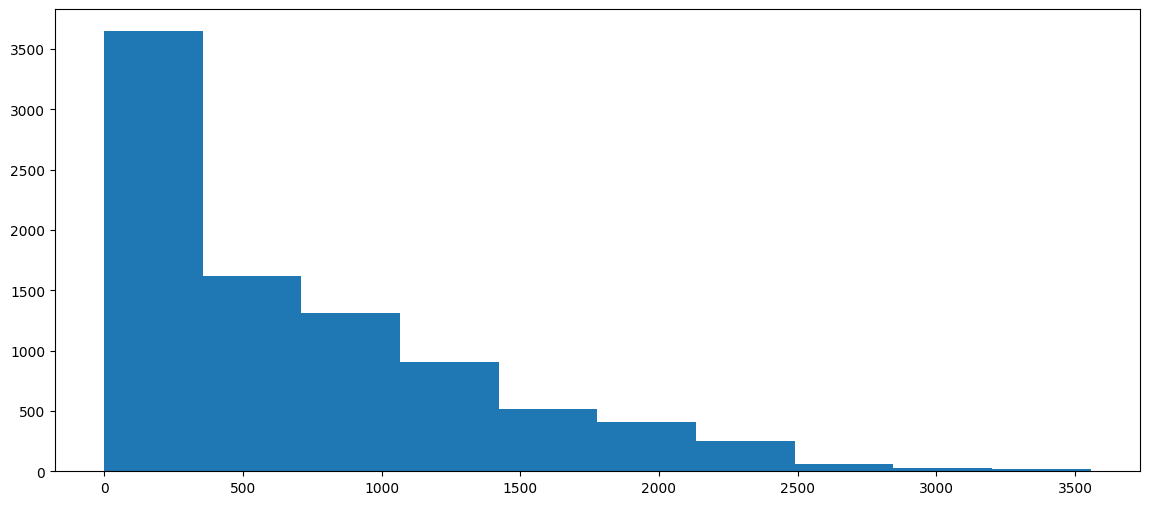

In [ ]:
plt.figure(figsize=(14,6))
plt.hist(bike_df['rented_bike_count'])
plt.show()

##### Which statistical test have you done to obtain P-Value?

Have used K^2 Normality Test to test the normality distribution

##### Why did you choose the specific statistical test?

This test is statistical test in frequentis statistics to test Normality.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0): Humidity and Temperature independent

Alternate Hypothesis(H1 or Ha): Humidity and Temperature are dependent samples

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import spearmanr
stat, p = spearmanr(bike_df['temp'], bike_df['dew_point_temp'])

print('stat=%.3f, p=%5f' % (stat, p))
if(p>0.05):
  print('Null Hypothesis accepted. temp and dew_point_temp are independent')
else:
  print('Rejected Null Hypothesis. temp and dew_point_temp are dependent')

stat=0.912, p=0.000000
Rejected Null Hypothesis. temp and dew_point_temp are dependent


##### Which statistical test have you done to obtain P-Value?

The Spearman's Rank Correlation Test

##### Why did you choose the specific statistical test?

The Spearman's rank correlation coefficient (rs) is a method of testing the strength and direction (positive or negative) of the correlation (relationship or connection) between two variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: mean of non sumemr >= mean of summer

H1: mean of non summer < mean of summer

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

In [ ]:
non_summer_df = df[df['Seasons'] != 'Summer']
print(np.mean(non_summer_df['Rented Bike Count']))
print(np.std(non_summer_df['Rented Bike Count']))

593.5714285714286
588.8647939115225


In [ ]:
summer_df = df[df['Seasons'] == 'Summer']
print(np.mean(summer_df['Rented Bike Count']))
print(np.std(summer_df['Rented Bike Count']))

1034.0733695652175
690.0884362677947


In [ ]:
mean1 = np.mean(non_summer_df['Rented Bike Count'])
mean2 = np.mean(summer_df['Rented Bike Count'])
std1 = np.std(non_summer_df['Rented Bike Count'])
std2 = np.std(summer_df['Rented Bike Count'])
n1 = non_summer_df.shape[0]
n2 = summer_df.shape[0]
#zValue = (x1 mean-x2 mean)-(µ1-µ2)/sqrt((s1**2/n1) + (s**2/n2))
zValue = ((mean1-mean2) - (0))/np.sqrt(((std1**2)/n1)+(std2**2/n2))
print(zValue)

-26.877626154652123


In [ ]:
import scipy.stats as stats

# Define the z-score of interest

# Lookup the area to the left of the z-score using the CDF function of the standard normal distribution
p = stats.norm.cdf(zValue)

print(f'The P value is {p}')
if(p>0.05):
  print('Null Hypothesis accepted. mean of non sumemr >= mean of summer')
else:
  print('Rejected Null Hypothesis. mean of non summer < mean of summer')

The P value is 2.0057613123491506e-159
Rejected Null Hypothesis. mean of non summer < mean of summer


##### Which statistical test have you done to obtain P-Value?

We have used Two sample T-test to compare the means of unknown populations

##### Why did you choose the specific statistical test?

It's a method used to test whether the unknown population's mean of two group's are equal or not

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
bike_df.isnull().sum()

rented_bike_count    0
hour                 0
temp                 0
humidity             0
wind_speed           0
visibility           0
dew_point_temp       0
solar_radiation      0
rainfall             0
snowfall             0
seasons              0
holiday              0
func_day             0
months_string        0
days                 0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

"At first, we checked if there were any missing values in our dataset.
As we can see from the above result, there are no missing values in the dataset."

### 2. Handling Outliers

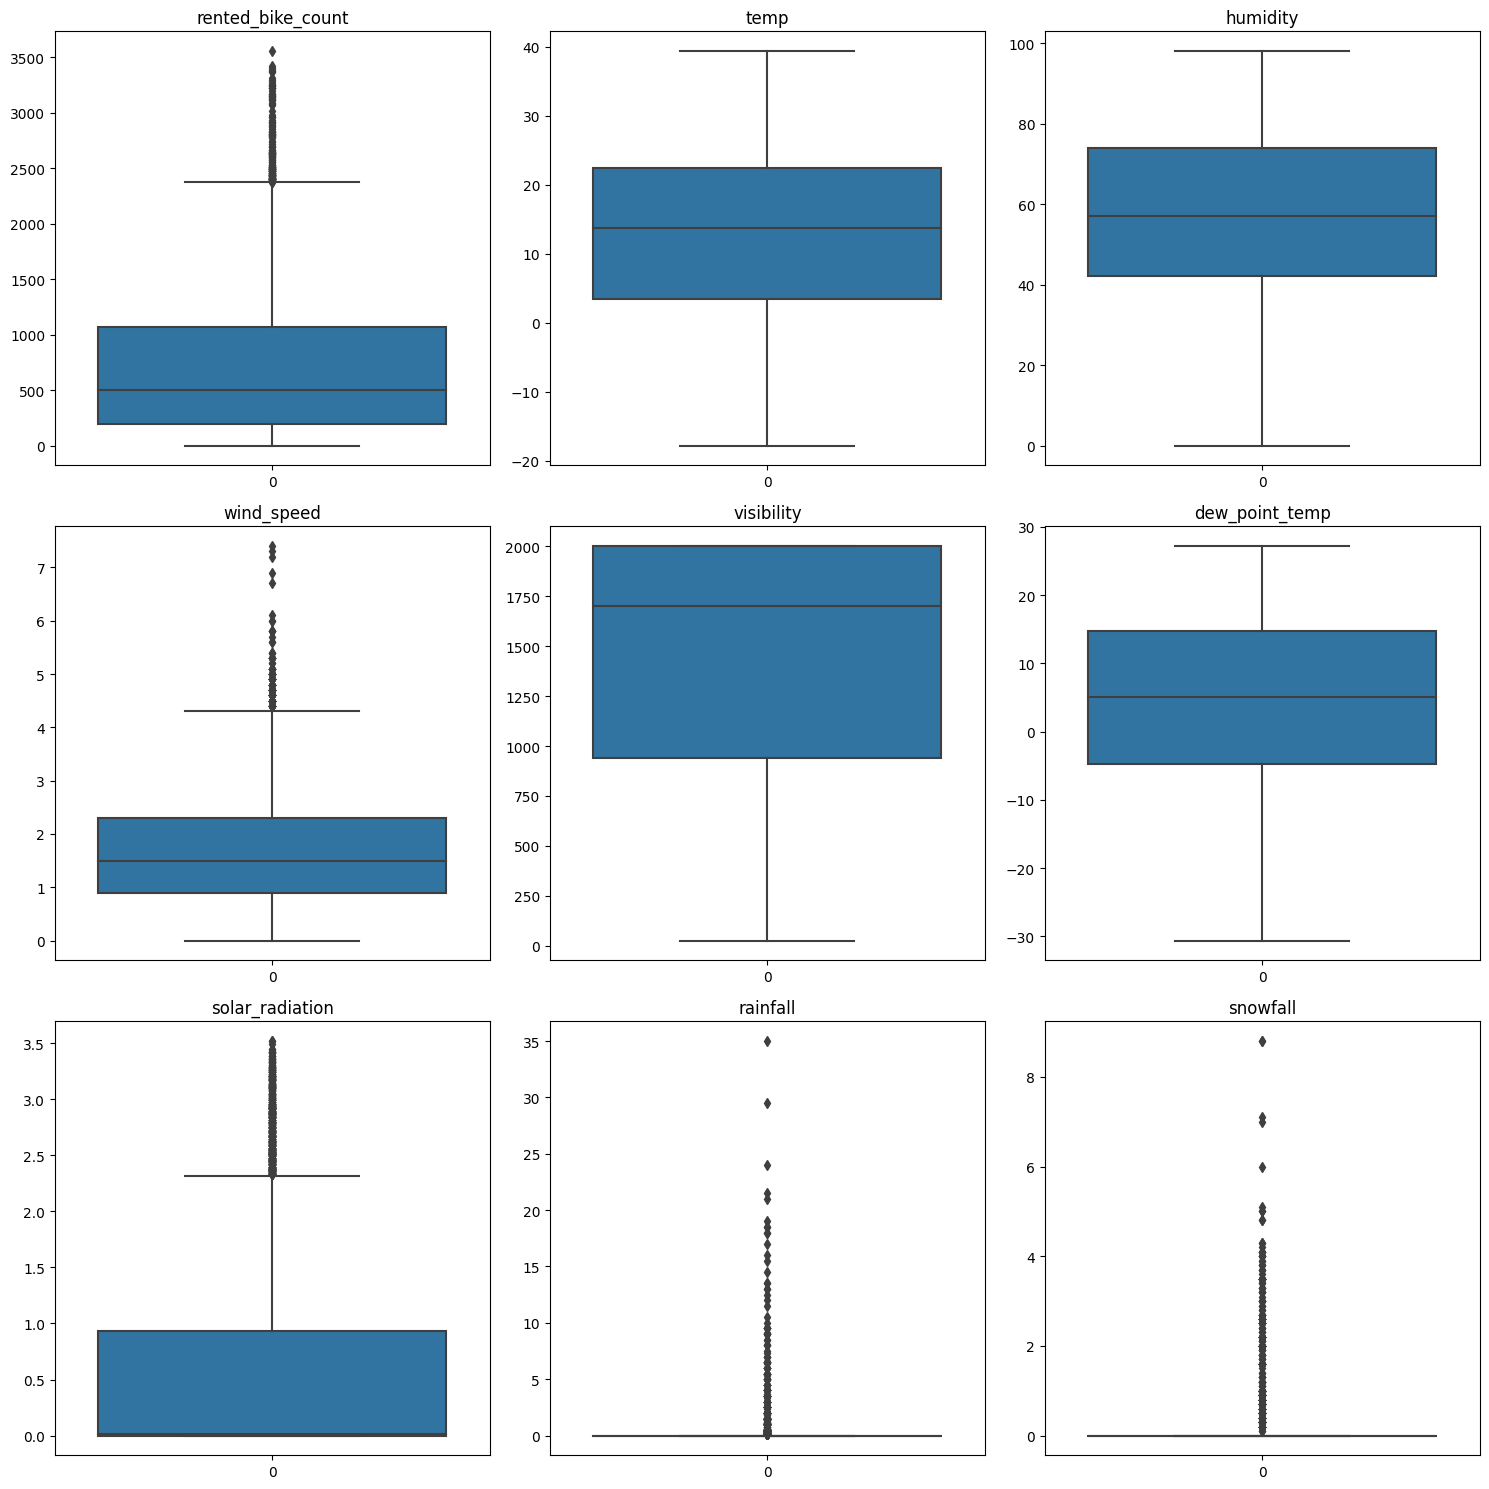

In [ ]:
# Chart - 2 visualization code
#Boxplot
#Checking for outliers
n=1
plt.figure(figsize=(15,15))
for col in num_columns[:]:
  plt.subplot(3,3,n)
  n+=1
  sns.boxplot(bike_df[col])
  plt.title(col)
  plt.tight_layout()

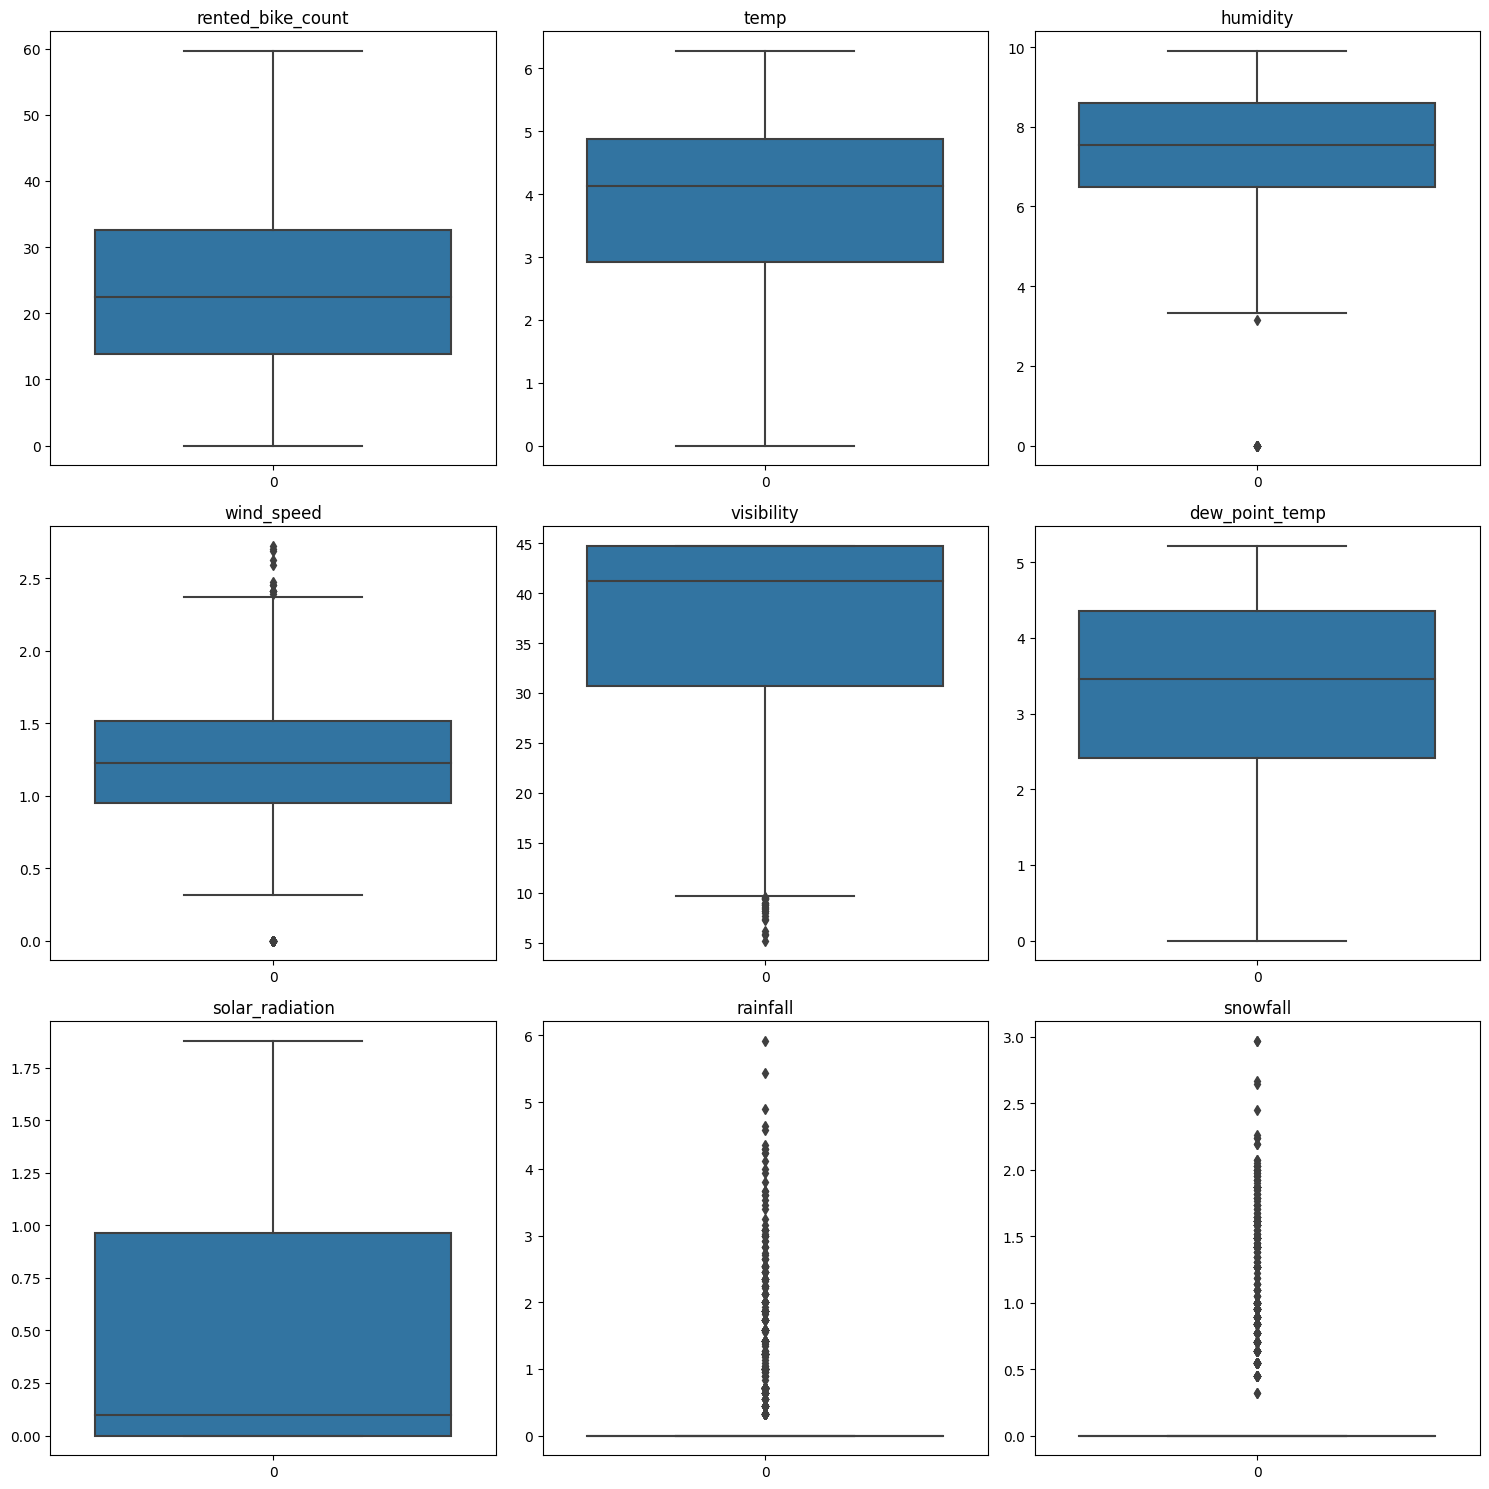

In [ ]:
# Handling Outliers & Outlier treatments
# Chart - 2 visualization code
#Boxplot
#Checking for outliers
n=1
plt.figure(figsize=(15,15))
for col in num_columns[:]:
  plt.subplot(3,3,n)
  n+=1
  sns.boxplot(np.sqrt(bike_df[col]))
  plt.title(col)
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

we have used square root transformation for treatment of outlier, by taking square root of variables, variables are compressed towards zero which can help to reduce the impact of extreme values and outliers on the variance of the variable. This can result in a more normal distribution of the variable, which is often a desirable property for statistical analyses.

### 3. Feature Manipulation

#### 1. Feature Manipulation

In [ ]:
#list of numerical column
num_columns=['rented_bike_count', 'temp', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temp',
       'solar_radiation', 'rainfall', 'snowfall']
print(f"The numerical columns are {num_columns}")

The numerical columns are ['rented_bike_count', 'temp', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall']


<Axes: >

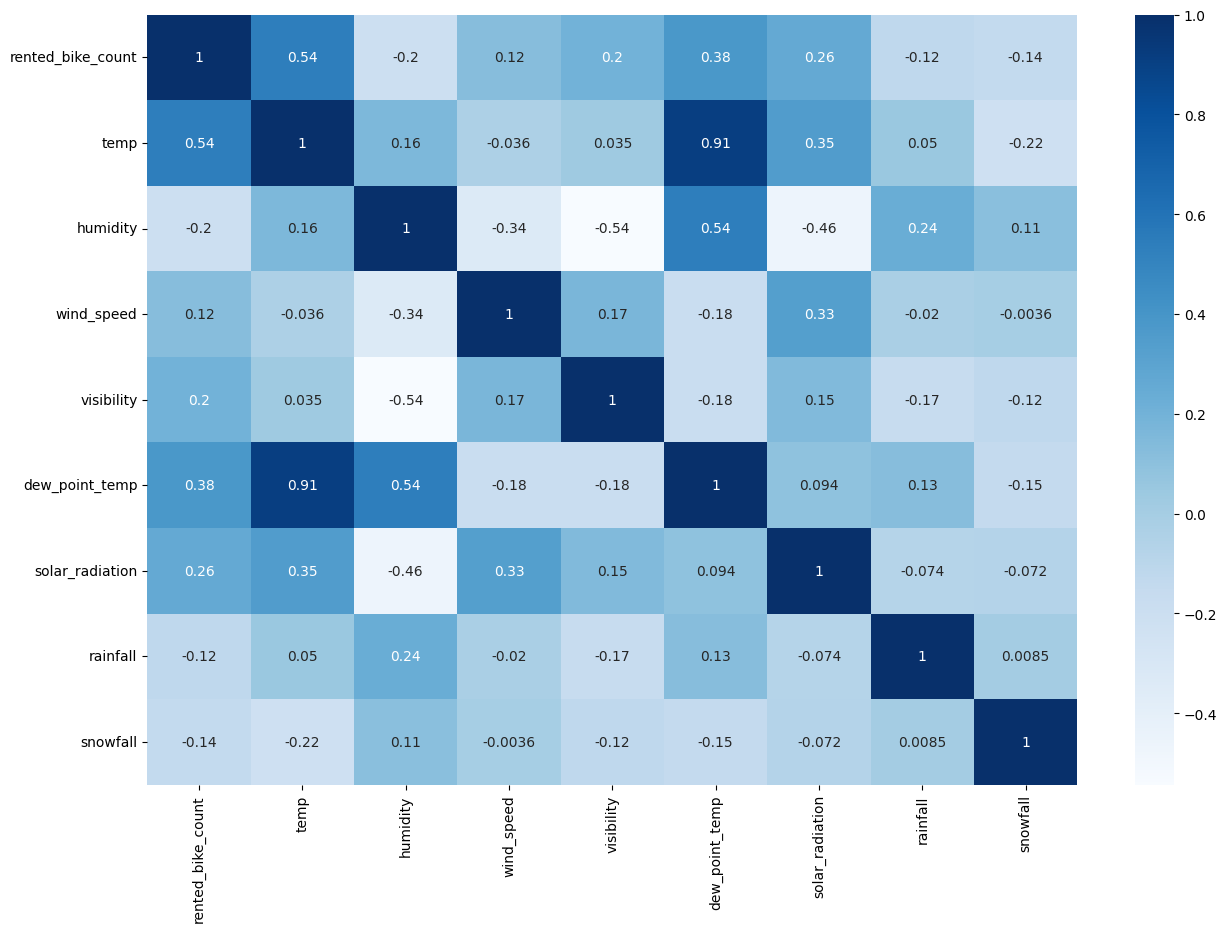

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
plt.figure(figsize = (15,10))
sns.heatmap(bike_df.corr(), annot = True, cmap = 'Blues')

In [ ]:
# Dropping the temperature and dew point temperature columns because we combined these two features into a single feature to eliminate multicollinearity.
bike_df['Temperature_and_dew_temp'] = bike_df['temp']+bike_df['dew_point_temp']
bike_df.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,months_string,days,Temperature_and_dew_temp
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-22.8
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-23.1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-23.7
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-23.8
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-24.6


In [ ]:
bike_df.drop(['temp','dew_point_temp'],axis = 1,inplace = True)

<Axes: >

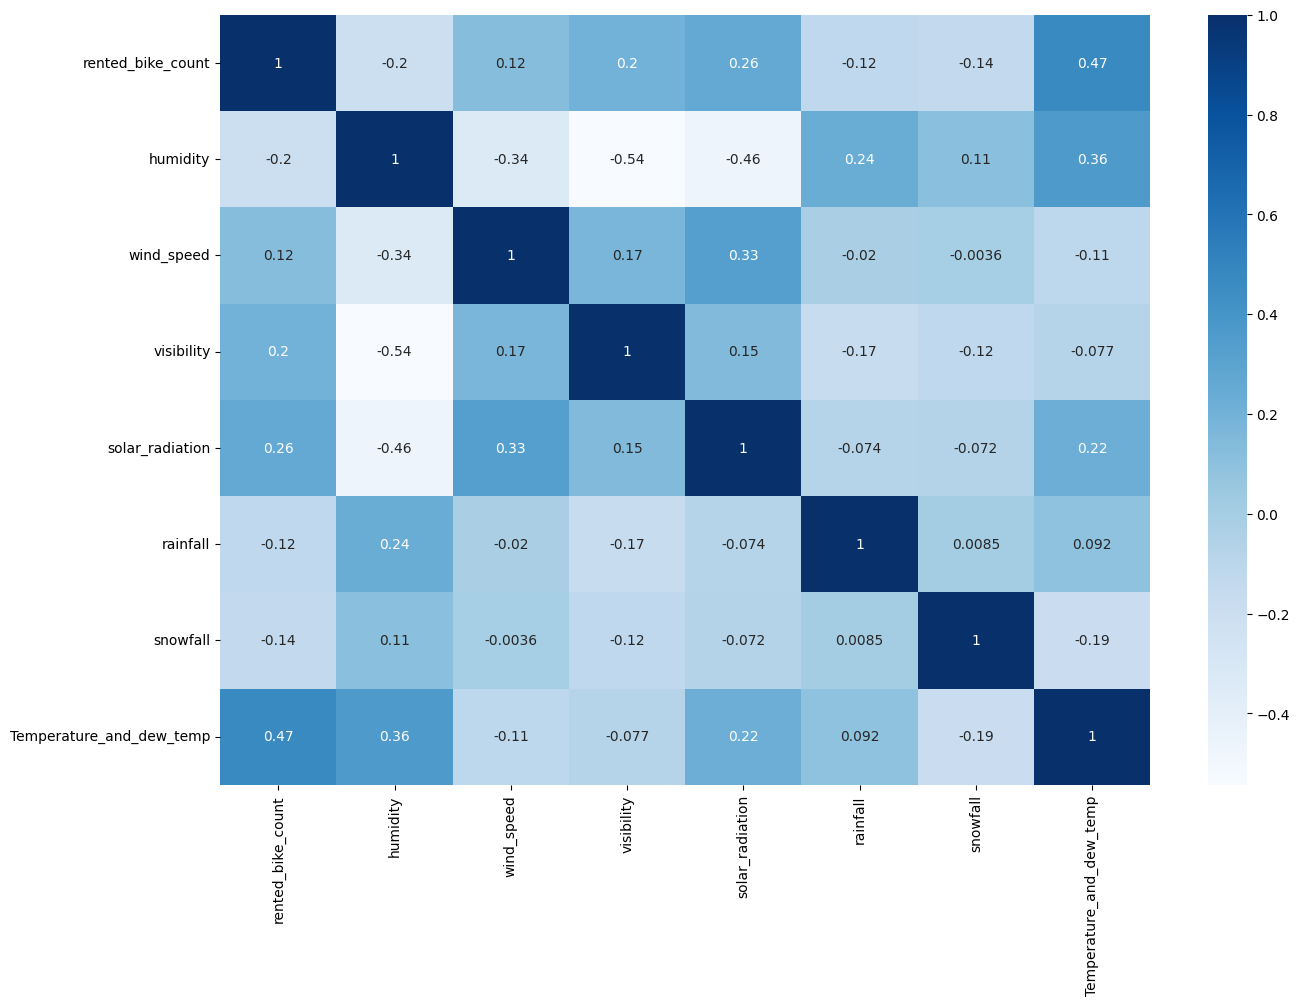

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
plt.figure(figsize = (15,10))
sns.heatmap(bike_df.corr(), annot = True, cmap = 'Blues')

* We found that the following features are positively correlated with target variable:
1. temperature and dew point temperature
2. solar radiation

* The following features are negatively correlated with target variable:
1. rainfall
2. snowfall

In [ ]:
#Checking the variance inflation factor for features
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    #print (X)

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] #or X.shape[1]

    return(vif)

In [ ]:
bike_df.head()

,rented_bike_count,hour,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,months_string,days,Temperature_and_dew_temp
0,254,0,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-22.8
1,204,1,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-23.1
2,173,2,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-23.7
3,107,3,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-23.8
4,78,4,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,December,Friday,-24.6


In [ ]:
calc_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['rented_bike_count']]])

,variables,VIF
0,humidity,4.948927
1,wind_speed,4.172802
2,visibility,4.390699
3,solar_radiation,2.056034
4,rainfall,1.078836
5,snowfall,1.116727
6,Temperature_and_dew_temp,2.166404


Now, the VIF factor is less than 10 for all features which indicates no multicolinearity and is good to perform our linear regression.

### 4. Categorical Encoding

In [ ]:
cat_columns = bike_df.describe(include=['object','category']).columns
cat_columns
print('The categorical features in the dataset are:',cat_columns)

The categorical features in the dataset are: Index(['hour', 'seasons', 'holiday', 'func_day', 'months_string', 'days'], dtype='object')


In [ ]:
bike_df.shape

(8760, 14)

### Creating dummy variables of categorical features
#### One hot encoding
**A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.**

In [ ]:
# Encode your categorical columns
# One hot encoding
def one_hot_encoding(data, column):
  data = pd.concat([data, pd.get_dummies(data[column], prefix = column, drop_first = True)], axis =1)
  data = data.drop([column], axis = 1)
  return data

for col in cat_columns:
  bike_df = one_hot_encoding(bike_df, col)

In [ ]:
bike_df.shape

(8760, 53)

In [ ]:
bike_df.head()

,rented_bike_count,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,Temperature_and_dew_temp,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,seasons_Spring,seasons_Summer,seasons_Winter,holiday_No Holiday,func_day_Yes,months_string_August,months_string_December,months_string_February,months_string_January,months_string_July,months_string_June,months_string_March,months_string_May,months_string_November,months_string_October,months_string_September,days_Monday,days_Saturday,days_Sunday,days_Thursday,days_Tuesday,days_Wednesday
0,254,37,2.2,2000,0.0,0.0,0.0,-22.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,204,38,0.8,2000,0.0,0.0,0.0,-23.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,173,39,1.0,2000,0.0,0.0,0.0,-23.7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,107,40,0.9,2000,0.0,0.0,0.0,-23.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,78,36,2.3,2000,0.0,0.0,0.0,-24.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
bike_df.shape

(8760, 53)

#### What all categorical encoding techniques have you used & why did you use those techniques?

*   We have nominal categorical type so we have to use One Hot Encoding
* "Because machine learning algorithms cannot work with
categorical data directly, we used one-hot encoding to convert it to numerical.
One-hot encoding allows the representation of categorical data to be more expressive."

### 5. Data Splitting

In [ ]:
# Separating the dependent and independent features.
X= (bike_df.drop(columns= ['rented_bike_count'], axis =1))
y = (bike_df['rented_bike_count'])



In [ ]:
# Split the data for train and test. Splitting the dataset as training and test data in 80/20 ratio.
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(7008, 52)
(1752, 52)


##### What data splitting ratio have you used and why?

Using the Train-Test-Split method, we have split our data into training and testing sets.
It is usually a good practise to keep 80% of the data in your training dataset and the rest, 20%, in your test dataset.

### 6. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
import numpy as np
pipe = Pipeline((
("lr", LinearRegression()),
))
for i in range(1,50):
  a = SelectKBest(k=i)
  NewX = a.fit_transform(X,y)
  # Split the data for train and test. Splitting the dataset as training and test data in 80/20 ratio.
  X_trainnew , X_testnew, y_trainnew, y_testnew = train_test_split(NewX, y, test_size = 0.2, random_state = 0)
  pipe.fit(X_trainnew,y_trainnew)
  print(i)
  print("Training")
  print(pipe.score(X_trainnew,y_trainnew))

  print("Testing")
  print(pipe.score(X_testnew,y_testnew))
  print("------------")

1
Training
0.04033374810175894
Testing
0.04559232977538441
------------
2
Training
0.1059998309117477
Testing
0.1152527886972824
------------
3
Training
0.3351022277482043
Testing
0.31066045675051
------------
4
Training
0.36471463190275544
Testing
0.34235124421788177
------------
5
Training
0.384119435068057
Testing
0.36714238089100304
------------
6
Training
0.42010770425536514
Testing
0.39475527488126916
------------
7
Training
0.4358449122289124
Testing
0.4025474776309014
------------
8
Training
0.4404196289489085
Testing
0.4121734302073873
------------
9
Training
0.4649477445077209
Testing
0.4441635254941405
------------
10
Training
0.4865092691118287
Testing
0.46681134528591606
------------
11
Training
0.5079979535150508
Testing
0.500051147671946
------------
12
Training
0.5091435215901107
Testing
0.5017396415549729
------------
13
Training
0.5406183518564571
Testing
0.5381286598908745
------------
14
Training
0.5423626760734677
Testing
0.541145669412493
------------
15
Training


##### What all feature selection methods have you used  and why?

For feature selection we have used SelectKBest machine learning that selects the top k features with the highest statistical significance scores. The method works by evaluating each feature against the target variable and ranking them based on their scores.

##### Which all features you found important and why?

We found out that all the features are important so we used all the features.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
# Perform linear regression using scaling
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
# Fit the Algorithm
lr.fit(X_train,y_train)
print("Training")
print(lr.score(X_train,y_train))

print("Testing")
print(lr.score(X_test,y_test))

print(lr.coef_)
print(lr.intercept_)

# Predict on the model
y_pred_test = lr.predict(X_test)

Training
0.7013039999974215
Testing
0.7008046795380595
[-8.98885094e+00  4.92197674e+00  6.38311097e-02  6.02574572e+01
 -5.76766991e+01  2.28414398e+01  1.37825307e+01 -9.73536385e+01
 -2.13239988e+02 -2.79457503e+02 -3.46439958e+02 -3.33263238e+02
 -1.56177998e+02  1.34275852e+02  4.77437280e+02  5.29487378e+01
 -1.83862573e+02 -2.01814557e+02 -1.57663098e+02 -1.65964384e+02
 -1.53312167e+02 -7.14956952e+01  5.52327683e+01  3.04431164e+02
  7.78616551e+02  4.97876415e+02  4.24540877e+02  4.18247246e+02
  3.29376918e+02  1.00098655e+02 -5.23143408e+01 -7.28754299e+01
 -1.51144059e+02  1.45065909e+02  9.32251117e+02 -2.51985442e+02
  1.40394377e+01 -1.07176684e+02 -5.80068126e+01 -9.79837361e+01
  2.77093749e+02 -8.78087389e+01  1.38027823e+02  9.21514773e+01
  1.63466060e+02  2.07162922e+01 -5.52390270e+01 -6.18959993e+01
 -1.31438582e+02 -2.85759958e+01 -3.05989026e+01 -2.35697813e+01]
-112.04274221109051


from the above results we see that model is giving low results

### Data Scaling,Transformation and Polynomial Technique

##### Which method have you used to scale you data and why?

For scaling we have used standard scaler to standardize the scale of input data and these has helped in trasnform data to have zero mean and unit variance.

In [ ]:
# Transform Your data using Scaling and Transformation
# using some pre-processors and pipeline to improve results
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline

pipe = Pipeline((
("sc",StandardScaler()),
("pt", PowerTransformer()),
("lr", LinearRegression()),
))

pipe.fit(X_train,y_train)

print("Training")
print(pipe.score(X_train,y_train))

print("Testing")
print(pipe.score(X_test,y_test))

y_pred_test = lr.predict(X_test)

Training
0.7284661895478347
Testing
0.7192311810488194


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, we have used Power Transformer to transform our data.
The reason behind it is to increase the symmetry of the distribution of the features.
If a feature is asymmetric, using a power transformation will make it more symmetric, improving the model's accuracy.

In [ ]:
#Using Polynomial Technique to improve the accuracy
from sklearn.preprocessing import PolynomialFeatures
pipe1 = Pipeline((
("sc",StandardScaler()),
("pt", PolynomialFeatures(degree=2)),
("lr", LinearRegression()),
))

pipe1.fit(X_train,y_train)

print("Training")
print(pipe1.score(X_train,y_train))

print("Testing")
print(pipe1.score(X_test,y_test))

Training
0.9208006536277605
Testing
0.8789393049836536


After implementing some pre-processors, we can see better results.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = ((1-(1-r2_lr)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 125219.99997316193
RMSE : 353.8643807635376
MAE : 267.4352670028642
R2 : 0.7008046795380595
Adjusted R2 : 0.6916474360630619


We have used Linear Regression Model to find the relationship between a dependent variable and one or more independent variables

MSE(Mean Squared Error) : 125211.79575143608

RMSE (Root Mean Squared Error) : 353.8527882487802

MAE(mean absolute error) : 267.4041115482976

R2 : 0.700824282355093

Adjusted R2 : 0.6916676388485978

In [ ]:
# storing the metrics of test set in a Dataframe
test_dict = {'Model':'Linear regression test ',
            'MAE':round((MAE_lr),3),
            'MSE':round((MSE_lr),3),
            'RMSE':round((RMSE_lr),3),
            'R2_score':round((r2_lr),3),
            'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df = pd.DataFrame(test_dict, index = [0])
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression test,267.435,125220.0,353.864,0.701,0.69


## **Residuals:**

**Residual analysis**

To validate assumptions of the model, and hence the reliability for inference.

**Distribution of the error terms**

We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.


Text(0.5, 0.98, 'Residual Analysis')

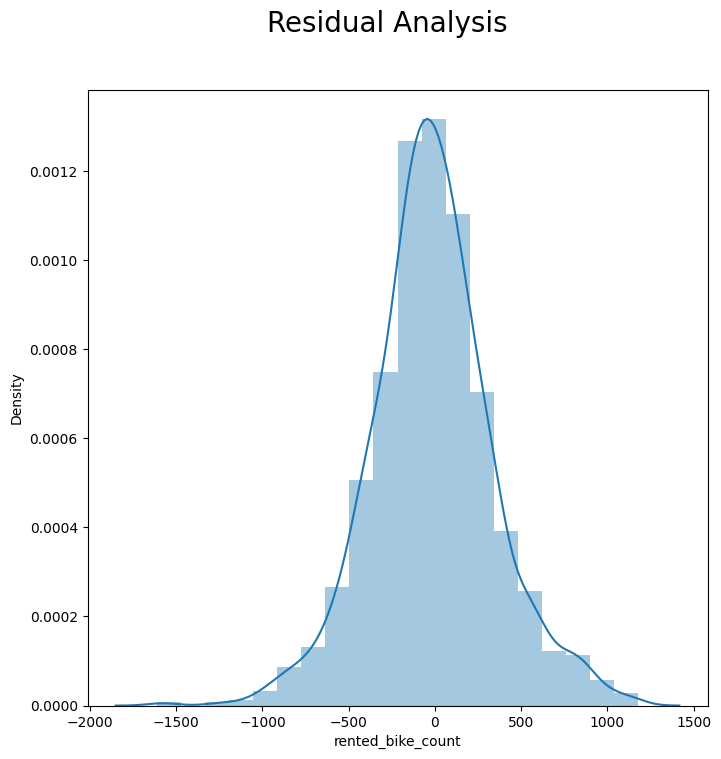

In [ ]:
fig=plt.figure(figsize=(8,8))

sns.distplot((y_test) - (y_pred_test),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

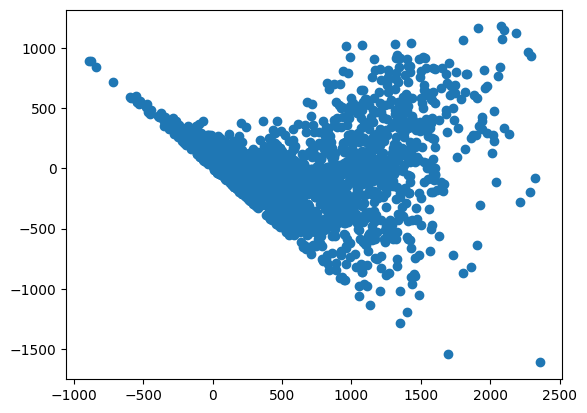

In [ ]:
# Heteroscedasticity
plt.scatter((y_pred_test), (y_test)-(y_pred_test))

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
from sklearn.model_selection import cross_val_score
scoreslr = cross_val_score(pipe,X_train,y_train,cv=10)
print(scoreslr)
# Predict on the model

[0.74664792 0.70165835 0.72441519 0.73444783 0.70184291 0.71893708
 0.74921516 0.7132291  0.71245025 0.72276898]


In [ ]:
import numpy as np
np.mean(scoreslr)

0.7225612774915502

We have used Cross-validation to evaluated the performance of a model by dividing the data into 10 subsets.

One subset is used for testing and the rest are used for training the model. This process is repeated several times, and the average performance of the model is calculated.

HyperTuning- we have used Hyperparameter tuning  for selecting the optimal values for the hyperparameters. we have used grid search , to find the optimal values of hyperparameters.


### Lasso Regression

In [ ]:
# Using GridSearch CV for hyperparameter tuning
### Cross validation

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5, 10,20,30,40,45,50,55,60,100] }

lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5, verbose= 10)
lasso_regressor.fit(X_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " r2 score is: ", lasso_regressor.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START alpha=1e-15................................................
[CV 1/5; 1/20] END .................alpha=1e-15;, score=0.703 total time=   0.5s
[CV 2/5; 1/20] START alpha=1e-15................................................
[CV 2/5; 1/20] END .................alpha=1e-15;, score=0.702 total time=   0.5s
[CV 3/5; 1/20] START alpha=1e-15................................................
[CV 3/5; 1/20] END .................alpha=1e-15;, score=0.682 total time=   0.4s
[CV 4/5; 1/20] START alpha=1e-15................................................
[CV 4/5; 1/20] END .................alpha=1e-15;, score=0.696 total time=   0.5s
[CV 5/5; 1/20] START alpha=1e-15................................................
[CV 5/5; 1/20] END .................alpha=1e-15;, score=0.695 total time=   0.5s
[CV 1/5; 2/20] START alpha=1e-13................................................
[CV 1/5; 2/20] END .................alpha=1e-13

In [ ]:
# Creating an instance of Lasso Regression
# Using alpha = 0.001 as we got from GridSearch CV

from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001,max_iter = 3000 )

lasso.fit(X_train, y_train)

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

y_pred_test_lasso = lasso.predict(X_test)

0.7013039965818603
0.7008044956569842


In [ ]:
#metrics for lasso regressor for test dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#calculate MSE
MSE_la= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE_la)

#calculate RMSE
RMSE_la=np.sqrt(MSE_la)
print("RMSE :",RMSE_la)

#calculate MAE
MAE_la= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_la)

#calculate r2 and adjusted r2
r2_la= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_la)
Adjusted_R2_la = (1-(1-r2_la)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_la)

MSE : 125220.07693154553
RMSE : 353.86448950346164
MAE : 267.4337176483539
R2 : 0.7008044956569842
Adjusted R2 : 0.6916472465540786


In [ ]:
# Storing the metrics of test set in a dataframe
train_dict2 = {'Model': 'Lasso Regression train',
              'MAE': round((MAE_la), 3),
              'MSE':round((MSE_la),3),
              'RMSE':round((RMSE_la),3),
              'R2_score':round((r2_la),3),
              'Adjusted R2':round((Adjusted_R2_la ),2)
              }

train_df = pd.DataFrame(train_dict2, index = [0])
train_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Lasso Regression train,267.434,125220.077,353.864,0.701,0.69


*   R2 score remains same in both Linear and Lasso regression.
*   Model is not overfitting



Text(0.5, 0.98, 'Residual Analysis')

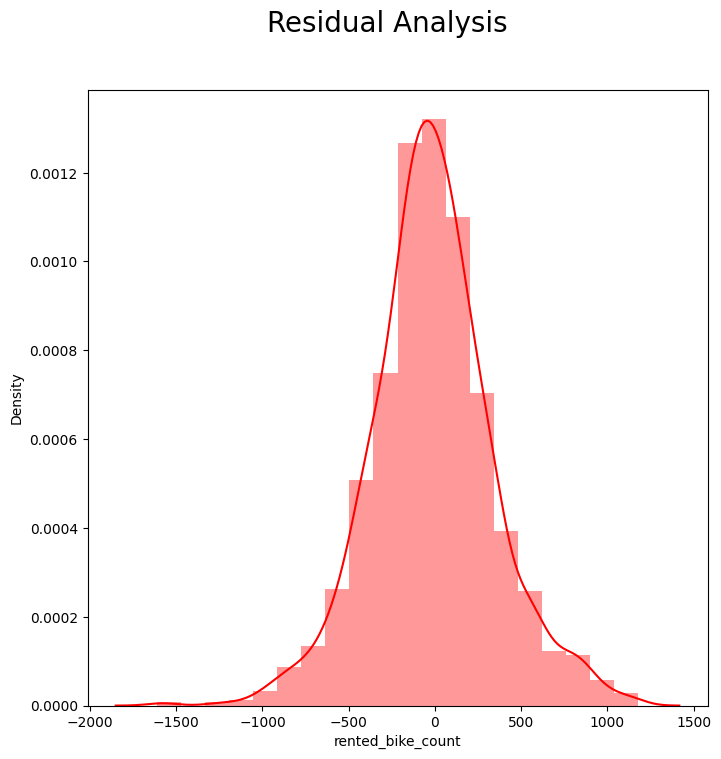

In [ ]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))

sns.distplot((y_test)- (y_pred_test_lasso),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

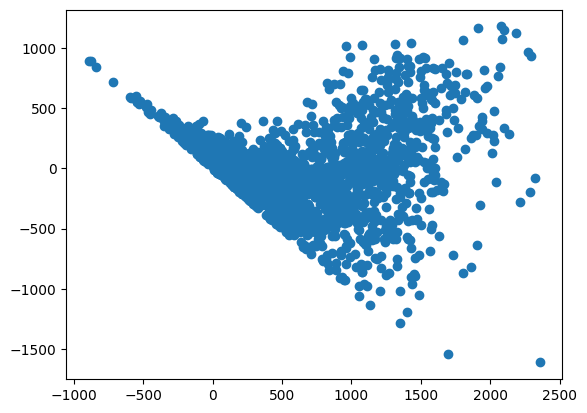

In [ ]:
## Heteroscedasticity
plt.scatter((y_pred_test_lasso), (y_test)- (y_pred_test_lasso))

### ML Model - 2

## Decision Tree

In [ ]:
# importing the packages essential for decision tree algorithm
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      max_features=30, max_leaf_nodes=100, random_state=0)

dt.fit(X_train, y_train)
print("Training Accuracy")
print(dt.score(X_train,y_train))
print("Testing Accuracy")
print(dt.score(X_test,y_test))
print('-------------------------')
y_pred_test_d = dt.predict(X_test)

Training Accuracy
0.77740512993562
Testing Accuracy
0.7400528794866525
-------------------------


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# evaluating metrics for test set
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_d )

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Decision tree test ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df = test_df.append(dict2, ignore_index = True)
test_df

We have used decision tree  that is often used for classification and regression tasks.It makes  decisions by recursively splitting the data into smaller subsets based on the features of the data. The decisions are made based on a set of rules that are generated by the algorithm during the training process.

MSE : 108793.74173850266

RMSE : 329.8389633419658

MAE : 225.29633167170354

R2 : 0.7400528794866525

Adjusted R2 : 0.7320968757981923

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Using GridSearchCV to find the optimum depth and features
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [i for i in range(50)], 'max_features': [i for i in range(50)] }

dt_re = GridSearchCV(dt, parameters, scoring='r2', cv=5, verbose= 10)
dt_re.fit(X_train, y_train)


In [ ]:
print(dt_re.best_score_, dt_re.best_params_)

Using Grid search we found the best parameter for max_depth and max_features.

In [ ]:
# importing the packages essential for decision tree algorithm
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion='mse', max_depth=18,
                      max_features=49, max_leaf_nodes=100, random_state=0)

# Fit the Algorithm
dt.fit(X_train, y_train)
print("Training Accuracy")
print(dt.score(X_train,y_train))
print("Testing Accuracy")
print(dt.score(X_test,y_test))
print('-------------------------')
# Predict on the model
y_pred_test_d = dt.predict(X_test)

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Decision tree test ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df = test_df.append(dict2, ignore_index = True)
test_df.drop_duplicates()

In [ ]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))

sns.distplot((y_test)- (y_pred_test_d),bins=20,color='m')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

In [ ]:
# Heteroscedasticity check
plt.scatter((y_pred_test_d), (y_test)-(y_pred_test_d))

The above plot looks homogeneous as compared to the linear and lasso regression

In [ ]:
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import graphviz

In [ ]:
graph = Source(tree.export_graphviz(dt, out_file=None
   , feature_names=X.columns
   , filled = True))
display(SVG(graph.pipe(format='svg')))

**Check the most important features from all the given features**

In [ ]:
dt.feature_importances_

In [ ]:
#def get_features_importance (optimal_model,X_train):
features = X.columns
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##### Which hyperparameter optimization technique have you used and why?

We have used Cross-validation to evaluated the performance of a model by dividing the data into 10 subsets.
One subset is used for testing and the rest are used for training the model. This process is repeated several times, and the average performance of the model is calculated.
 HyperTuning- we have used Hyperparameter tuning  for selecting the optimal values for the hyperparameters. we have used grid search , to find the optimal values of hyperparameters


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, using hyperparameter and Cross-validation we got the best parameter for 'max_depth': 18, 'max_features': 49}

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Using those parameter we improved our R2 score

### ML Model - 3

## Random Forest

In [ ]:
# ML Model - 3 Implementation
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf = RandomForestRegressor()
# Fit the Algorithm
rf.fit(X_train,y_train)

print("Training Accuracy")
print(rf.score(X_train,y_train))
print("Testing Accuracy")
print(rf.score(X_test,y_test))

# Predict on the model
y_pred_test_r = rf.predict(X_test)





#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters = {'max_depth': [i for i in range(10,30,4)], 'max_features': [i for i in range(30,50,4)] }

rf_re = GridSearchCV(rf, parameters, scoring='r2', cv=5, verbose= 10)
rf_re.fit(X_train, y_train)


In [ ]:
rf_re.best_params_


Using Grid search we found the best parameter for max_depth and max_features.

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf = RandomForestRegressor(max_depth=26,max_features=34)
# Fitting the model
rf.fit(X_train,y_train)

print("Training Accuracy")
print(rf.score(X_train,y_train))
print("Testing Accuracy")
print(rf.score(X_test,y_test))

y_pred_test_r = rf.predict(X_test)



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# evaluating the metrics for test data

from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf )


The R2_score for test data is around 0.92 which is a good score.

We have used Random forest that used uses multiple decision trees to improve the performance of a model. It is a powerful and popular algorithm that is often used for classification and regression tasks.

MSE : 41045.4588738687

RMSE : 202.5967889031529

MAE : 120.4401707603745

R2 : 0.9019277333979666

Adjusted R2 : 0.8989261101705942

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),3)}
test_df = test_df.append(dict2, ignore_index = True)
test_df.drop_duplicates()

In [ ]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))

sns.distplot((y_test)- (y_pred_test_r),bins=20,color='g')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

In [ ]:
# Heteroscedasticity check
plt.scatter((y_pred_test_r), (y_test)-(y_pred_test_r))

The above plot suggests that the error is homogeneous

In [ ]:
rf.feature_importances_

In [ ]:
importances = rf.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),3)}
test_df = test_df.append(dict2, ignore_index = True)
test_df.drop_duplicates()

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We can see that the R2_score of Random forest regression is better than other regression models

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have used the mean square error (MSE), mean absolute error (MAE), root mean square error (RMSE), and R2 score for a positive business impact.

MSE: It represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

MAE: The mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

The RMSE tells how well a regression model can predict the value of a response variable in absolute terms, while R-Squared tells how well the predictor variables can explain the variation in the response variable.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have chosen the "Random Forest Regression" model as our final prediction model because it is giving us the highest accuracy and R2 score value as compared to other regression models.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

We have used three different models: linear regression, decision trees, and random forest regression.

We have determined the importance of the features and found that the most important features in our dataset are temperature and dew point temperature, followed by humidity and solar radiation.

From our model explanatory power, we have observed that the data is time-dependent, the values for variables like temperature, solar radiation, humidity, etc., will not always be consistent, and hence, there will be scenarios where the model might not perform well.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Save the File
import pickle
pickle.dump(rf, open("/content/drive/MyDrive/BikeRentalRegression/bestModel.pkl", 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
loaded_model = pickle.load(open("/content/drive/MyDrive/BikeRentalRegression/bestModel.pkl", 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The “no free lunch” (NFL) theorem for supervised machine learning is a theorem that essentially implies that no single machine learning algorithm is universally the best-performing algorithm for all problems.

Keeping that in mind we tried to apply several ML algorithms like Linear Regression, Lasso Regression, Ridge Regression, Decision Tree Regressor and Random Forest Regressor.

Out of all we found Random Forest Regressor is performing better than all others with R2 score of 0.900 for this dataset.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***